<a href="https://colab.research.google.com/github/Israelamat/Study-and-prediction-of-U.S.-contamination/blob/main/Proyecto_Final_IA_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Por qu√© es relevante estudiar la contaminaci√≥n del aire y predecirla

La contaminaci√≥n atmosf√©rica es uno de los principales problemas medioambientales y de salud p√∫blica a nivel mundial. Seg√∫n la Organizaci√≥n Mundial de la Salud (OMS), m√°s del 90% de la poblaci√≥n mundial respira aire contaminado, lo que contribuye a m√°s de 7 millones de muertes prematuras al a√±o (OMS, 2018).

En Estados Unidos, a pesar de las pol√≠ticas regulatorias como la Clean Air Act, todav√≠a existen numerosas regiones que exceden los est√°ndares de calidad del aire, especialmente en √°reas urbanas e industriales. La exposici√≥n prolongada a contaminantes como el di√≥xido de nitr√≥geno (NO‚ÇÇ), ozono (O‚ÇÉ), di√≥xido de azufre (SO‚ÇÇ) y mon√≥xido de carbono (CO) est√° asociada a enfermedades respiratorias, cardiovasculares y aumento de hospitalizaciones (EPA, 2021).

Dada la importancia de monitorear y controlar estos contaminantes, surge la necesidad de desarrollar modelos predictivos que permitan anticipar los niveles de contaminaci√≥n en el futuro. Un modelo de este tipo no solo ayuda a comprender las din√°micas de la calidad del aire, sino que tambi√©n puede servir como herramienta de apoyo para:

Activar alertas tempranas ante posibles episodios de contaminaci√≥n grave.

Ayudar a planificar pol√≠ticas p√∫blicas y medidas de mitigaci√≥n.

Informar a la poblaci√≥n vulnerable (ni√±os, ancianos, personas con asma).

Adem√°s, el an√°lisis de los datos hist√≥ricos de contaminaci√≥n permite explorar la evoluci√≥n de la calidad del aire a lo largo del tiempo y evaluar si las tendencias actuales son sostenibles o si, por el contrario, seguimos en una trayectoria que podr√≠a empeorar los niveles de contaminaci√≥n en el futuro.

Por tanto, este proyecto tiene como objetivo desarrollar un modelo de predicci√≥n de la calidad del aire, utilizando un dataset real de contaminaci√≥n en Estados Unidos que incluye medidas de cuatro contaminantes principales en distintas localizaciones, fechas y horarios. Este an√°lisis permitir√° no solo predecir valores futuros, sino tambi√©n identificar factores clave que influyen en los niveles de contaminaci√≥n y aportar una visi√≥n sobre el posible impacto de mantener las mismas condiciones en los pr√≥ximos a√±os.

El estudio de la contaminaci√≥n del aire a trav√©s de t√©cnicas de machine learning es un √°rea activa de investigaci√≥n (Zhang et al., 2012; Wang & Chen, 2018) y puede proporcionar soluciones complementarias a los sistemas tradicionales de monitoreo mediante modelos estad√≠sticos.

# Bibliograf√≠a:

Organizaci√≥n Mundial de la Salud (2018). Ambient air pollution: Health impacts. https://www.who.int/airpollution

United States Environmental Protection Agency (EPA) (2021). Air Quality Trends. https://www.epa.gov/air-trends

Zhang, Y., Bocquet, M., Mallet, V., Seigneur, C., & Baklanov, A. (2012). Real-time air quality forecasting, part I: History, techniques, and current status. Atmospheric Environment, 60, 632-655.

Wang, Y., & Chen, Y. (2018). Air quality forecasting using machine learning algorithms: A review. Current Pollution Reports, 4(2), 104‚Äì113.

In [2]:
#Instalamso openml para poder acceder a los datasets
!pip install openml

In [3]:
# Importamos openml para cargar el dataset en cuestion
# Enlace al dataset; https://www.openml.org/search?type=data&status=active&id=43586
import openml
dataset = openml.datasets.get_dataset(43586)
print(type(dataset))

<class 'openml.datasets.dataset.OpenMLDataset'>


In [4]:
# Lo transformamos al formato CSV para poder trabajar de una forma mas comoda
X, y, attribute_names, _ = dataset.get_data(target=dataset.default_target_attribute, dataset_format='dataframe')
df = X.copy()
df[dataset.default_target_attribute] = y

# Ver primeras filas
print(df.head())
df_raw = df.copy()

   Unnamed:_0  State_Code  County_Code  Site_Num  \
0           0           4           13      3002   
1           1           4           13      3002   
2           2           4           13      3002   
3           3           4           13      3002   
4           4           4           13      3002   

                                   Address    State    County     City  \
0  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   
1  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   
2  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   
3  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   
4  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   

   Date_Local          NO2_Units  ...  SO2_Mean  SO2_1st_Max_Value  \
0  2000-01-01  Parts per billion  ...  3.000000                9.0   
1  2000-01-01  Parts per billion  ...  3.000000                9.0   
2  2000-01-01  Parts per billion

# An√°lisis del dataset

1. El linaje de los datos se refiere a la historia de las transformaciones y manipulaciones que los datos han sufrido desde su origen hasta su estado actual. En este caso, hemos revisado el dataset y no se han encontrado problemas evidentes que indiquen manipulaciones incorrectas o inconsistencias en los datos. Los registros parecen seguir un formato coherente, y las columnas corresponden a medidas de contaminaci√≥n del aire en diferentes ubicaciones de Estados Unidos, con variables bien definidas como niveles de NO2, O3, SO2, CO, entre otros. No hay indicios de que los datos hayan sido alterados de manera inapropiada.

2. La licencia del dataset es libre de restricciones para uso acad√©mico y de investigaci√≥n, lo que permite que sea utilizado para proyectos educativos, modelado de predicci√≥n, y an√°lisis sin la necesidad de pagar o solicitar permisos adicionales. Este tipo de licencia tambi√©n facilita la distribuci√≥n y el uso del dataset, permitiendo que sea compartido y modificado por otros usuarios con fines similares. Aseguramos que, seg√∫n la fuente del dataset (probablemente OpenML o Kaggle), este tiene licencia abierta, lo que lo hace adecuado para proyectos de modelado y an√°lisis.

Con 1 mill√≥n de registros y 30 columnas, el dataset es bastante adecuado para el desarrollo de un modelo de regresi√≥n en el que se busca predecir la calidad del aire en funci√≥n de las variables disponibles. Teniendo en cuenta que el n√∫mero de filas es grande, este volumen de datos proporciona una base s√≥lida para entrenar el modelo sin riesgo de sobreajuste, siempre que las caracter√≠sticas utilizadas sean relevantes.

En cuanto a las carter√≠sticas, 30 columnas no es un n√∫mero excesivo en comparaci√≥n con la cantidad de datos. De hecho, un n√∫mero moderado de caracter√≠sticas en un dataset grande generalmente es manejable y permite construir modelos robustos y eficientes. Sin embargo, es importante aplicar un an√°lisis de correlaci√≥n y de relevancia de las caracter√≠sticas para asegurar que no haya variables redundantes o irrelevantes que puedan afectar el rendimiento del modelo.


# An√°lisis de datos exploratorio

In [5]:
# Aqui pondremos los modulos que usaremos para el analisis
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_absolute_percentage_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import skew, kurtosis

In [6]:


# Mostrar el tama√±o (dimensi√≥n) del dataset: n√∫mero de filas y columnas
print("Tama√±o del dataset:")
print(f"N√∫mero de filas: {df.shape[0]}")
print(f"N√∫mero de columnas: {df.shape[1]}\n")

# Mostrar los nombres de todas las columnas presentes en el dataset
print("Columnas del dataset:")
print(df.columns)
print()

#############################################################################3

# Comprobar si hay valores nulos en cada columna y contar cu√°ntos son
print("N√∫mero de valores nulos por columna:")
print(df.isnull().sum())
print()

# Eliminamos la columna llamada 'None'
# Esta columna contiene valores irrelevantes ("NONE") que no aportan ning√∫n valor
# Al eliminarla, mejoramos la eficiencia del modelo y reducimos la
# dimensionalidad del dataset.
df = df.drop(columns=[None])

# Verificamos que la columna 'None' ha sido eliminada correctamente
# Al imprimir nuevamente los nombres de las columnas, podemos asegurarnos de que la columna ha sido eliminada.
print("\nNombres de las columnas despu√©s de la eliminaci√≥n:", df.columns)

##################################################################################3

# Verificar si existen columnas completamente vac√≠as (todas sus celdas nulas)
empty_cols = df.columns[df.isnull().all()]
if len(empty_cols) > 0:
    print("Columnas completamente vac√≠as (todas sus celdas son nulas):")
    print(list(empty_cols))
else:
    print("No hay columnas completamente vac√≠as.")
print()

# Mostrar el tipo de datos (dtype) de cada columna, para saber si son num√©ricas, de texto, etc.
print("Tipos de datos de las columnas:")
print(df.dtypes)
print()

# Mostrar un resumen estad√≠stico b√°sico de todas las columnas num√©ricas
print("Resumen estad√≠stico de las variables num√©ricas:")
print(df.describe().transpose())
# Esta medida muestras valores atipicos, algo que veremos con mas tranquilidad
# en la parte de lso outliners

# An√°lisis detallado de las caracter√≠sticas num√©ricas
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
print("Caracter√≠sticas num√©ricas analizadas:", list(numeric_cols))
print()

for col in numeric_cols:
    print(f"Analizando la variable num√©rica: {col}")
    print(f"Media: {df[col].mean():.2f}")
    print(f"Desviaci√≥n est√°ndar: {df[col].std():.2f}")
    print(f"M√≠nimo: {df[col].min()}")
    print(f"M√°ximo: {df[col].max()}")
    print()

# An√°lisis detallado de las caracter√≠sticas categ√≥ricas
categorical_cols = df.select_dtypes(include=['object']).columns
print("Caracter√≠sticas categ√≥ricas analizadas:", list(categorical_cols))
print()

for col in categorical_cols:
    print(f"Analizando la variable categ√≥rica: {col}")
    print(f"N√∫mero de categor√≠as: {df[col].nunique()}")
    print(f"Moda (categor√≠a m√°s frecuente): {df[col].mode()[0]}")
    print()

Tama√±o del dataset:
N√∫mero de filas: 1746661
N√∫mero de columnas: 30

Columnas del dataset:
Index([       'Unnamed:_0',        'State_Code',       'County_Code',
                'Site_Num',           'Address',             'State',
                  'County',              'City',        'Date_Local',
               'NO2_Units',          'NO2_Mean', 'NO2_1st_Max_Value',
        'NO2_1st_Max_Hour',           'NO2_AQI',          'O3_Units',
                 'O3_Mean',  'O3_1st_Max_Value',   'O3_1st_Max_Hour',
                  'O3_AQI',         'SO2_Units',          'SO2_Mean',
       'SO2_1st_Max_Value',  'SO2_1st_Max_Hour',           'SO2_AQI',
                'CO_Units',           'CO_Mean',  'CO_1st_Max_Value',
         'CO_1st_Max_Hour',            'CO_AQI',                None],
      dtype='object')

N√∫mero de valores nulos por columna:
Unnamed:_0                 0
State_Code                 0
County_Code                0
Site_Num                   0
Address                    0

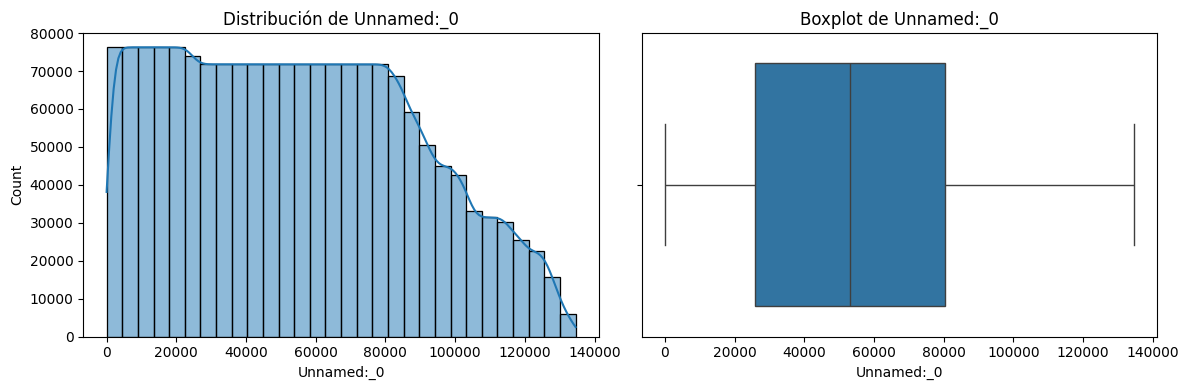

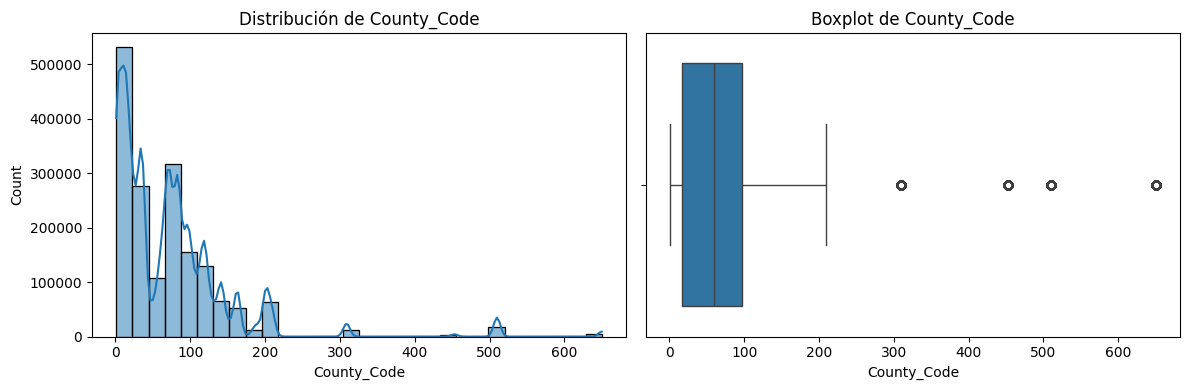

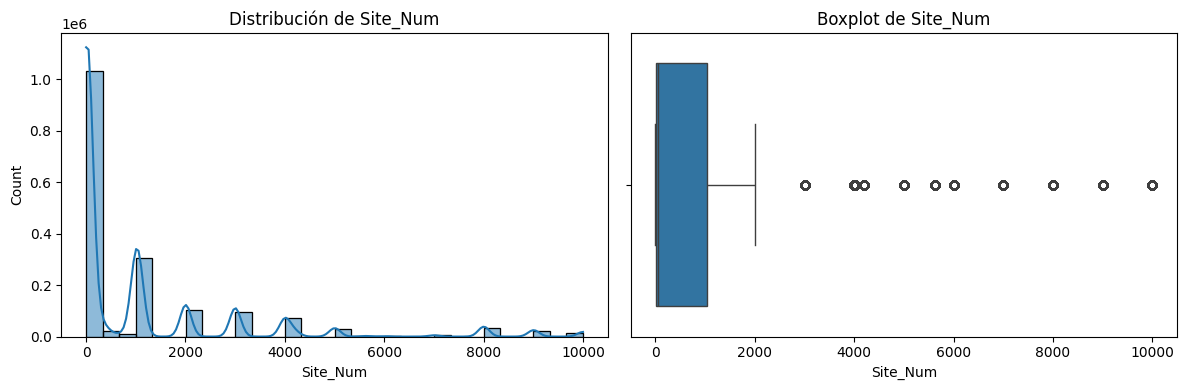

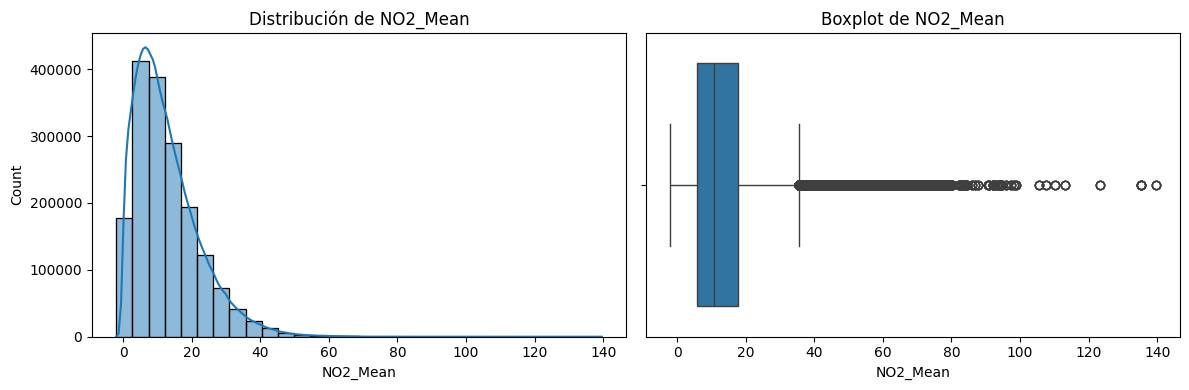

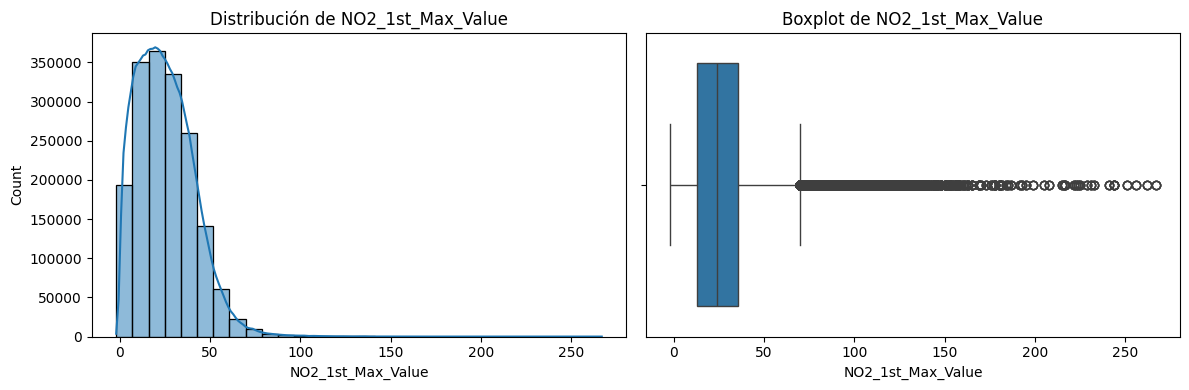

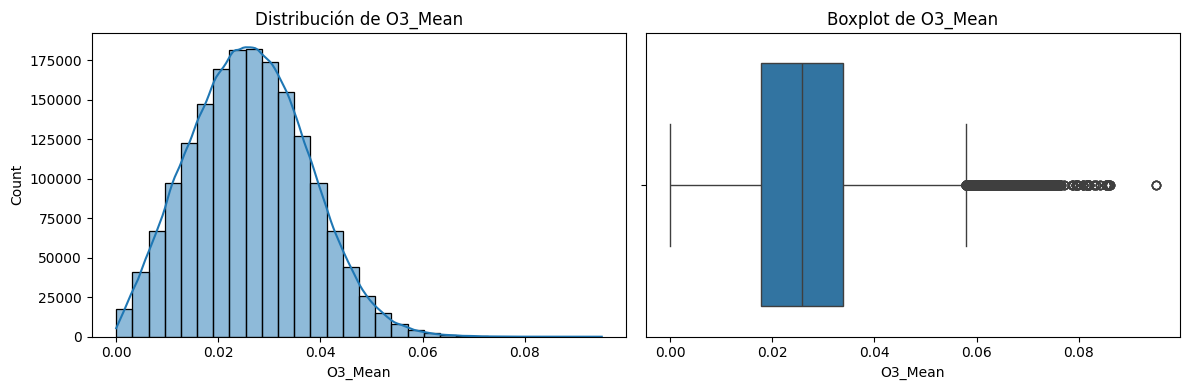

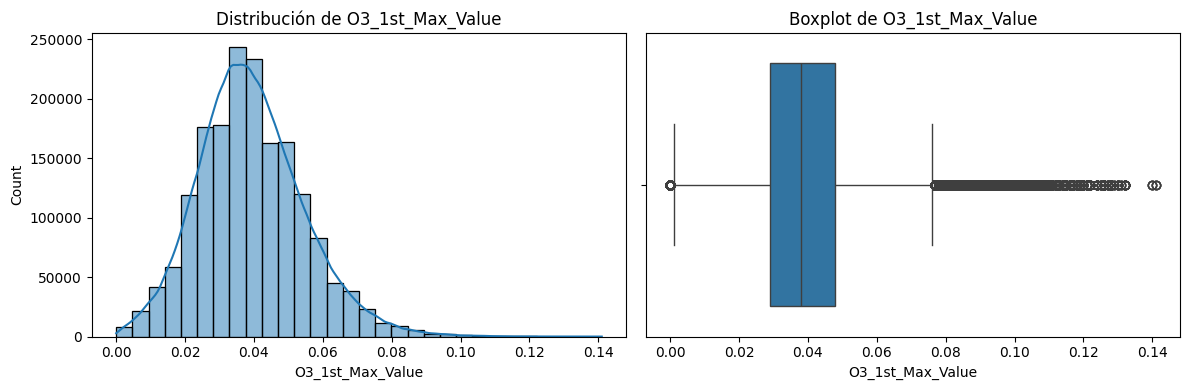

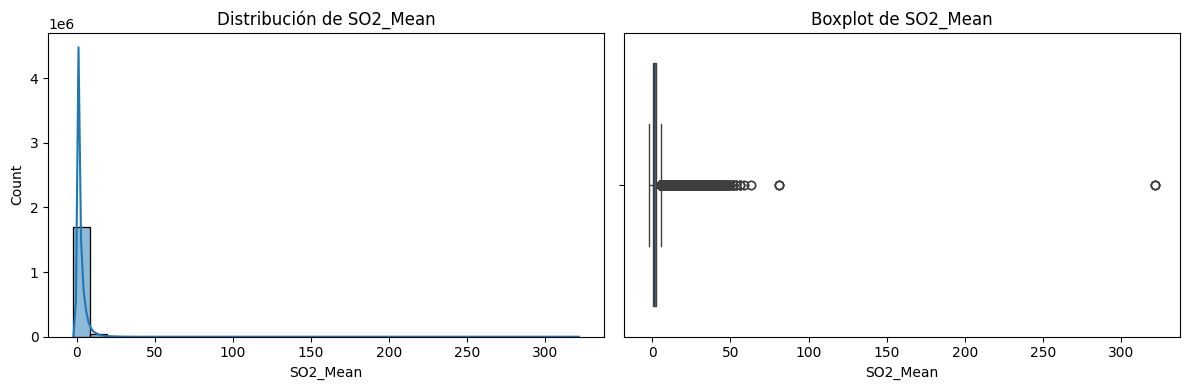

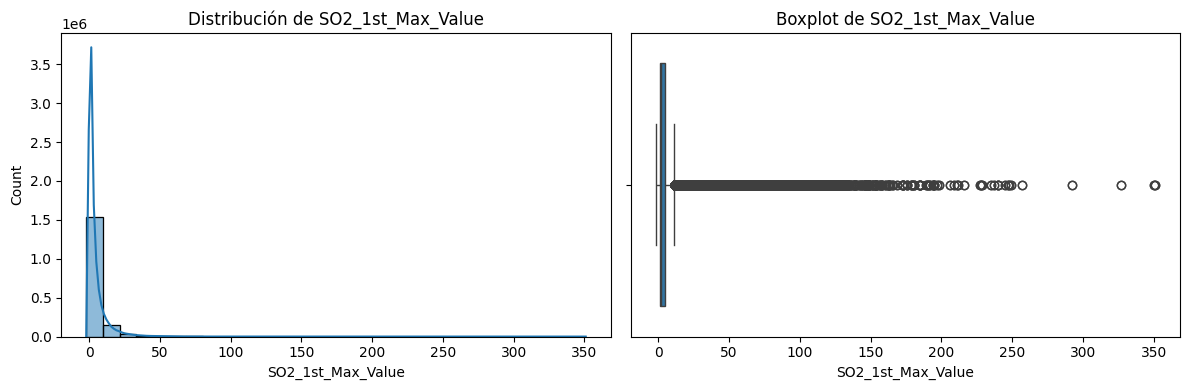

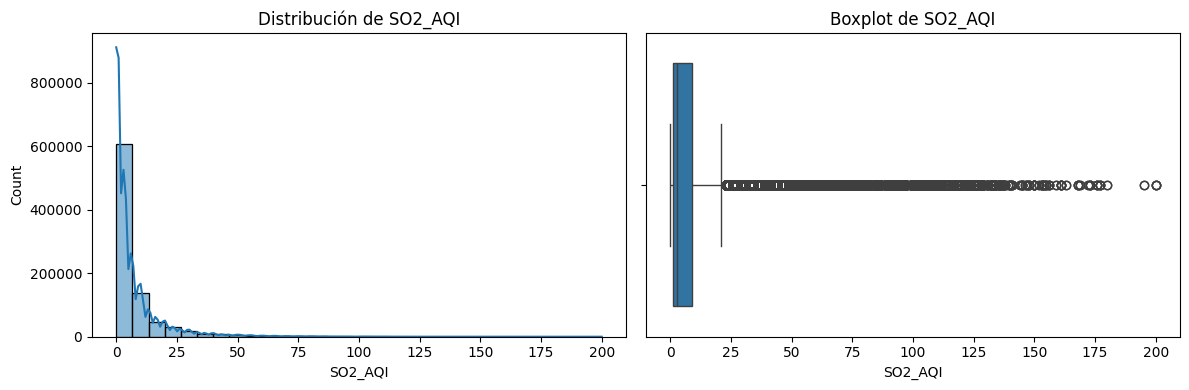

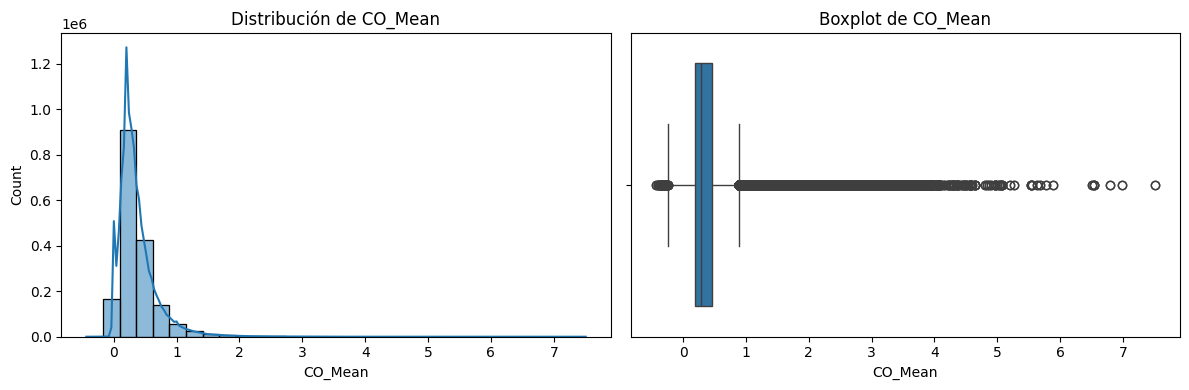

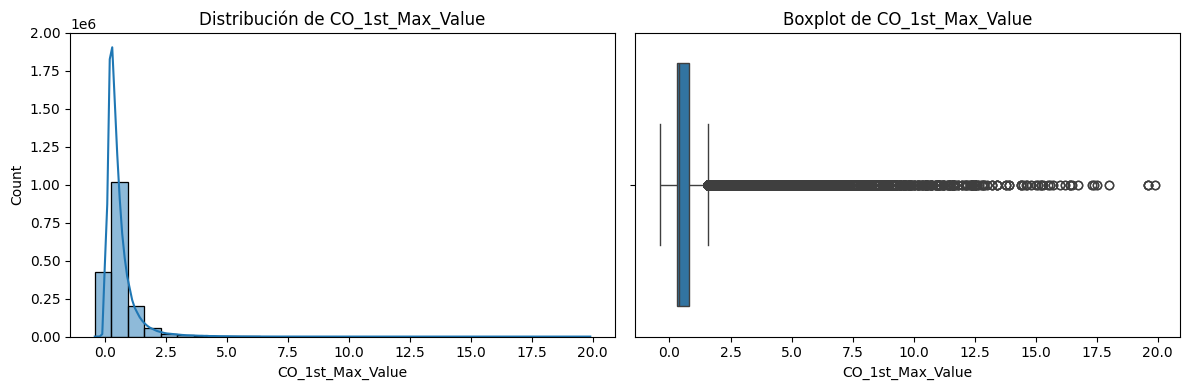

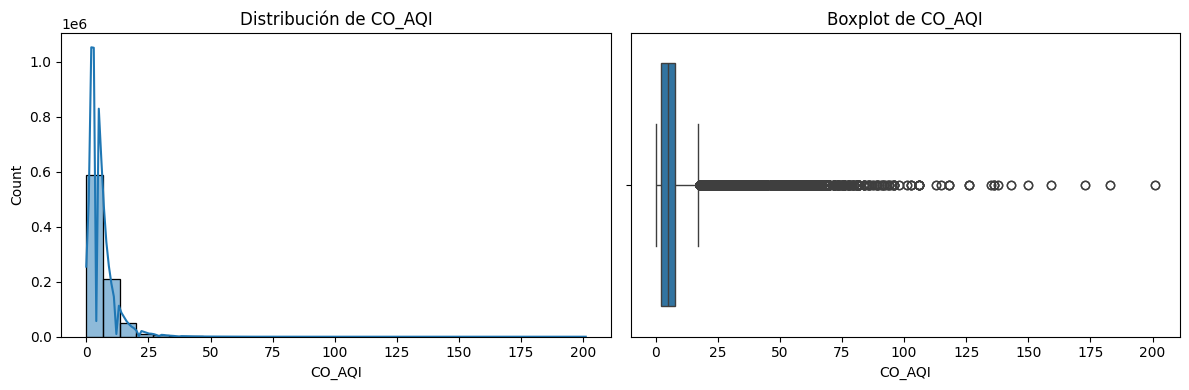

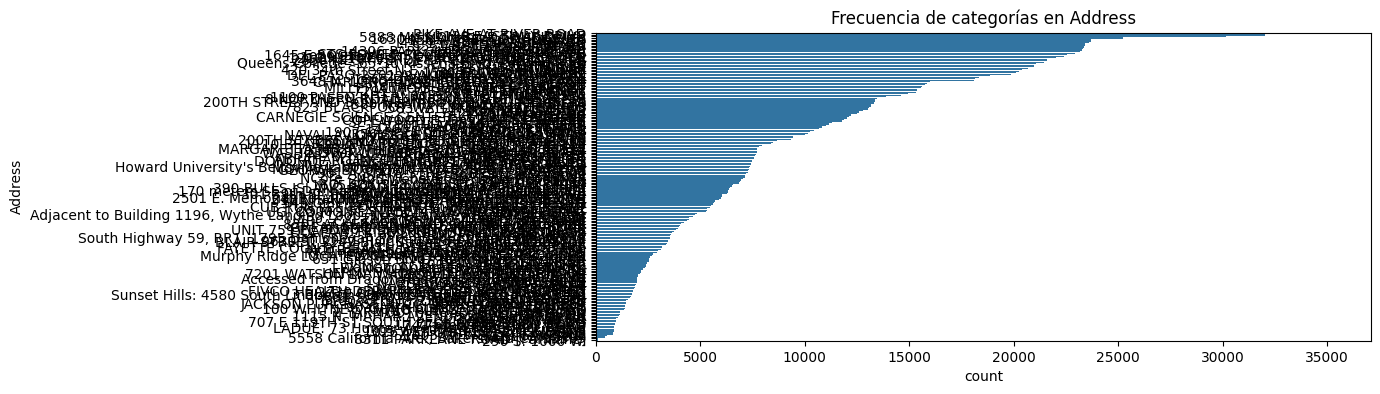

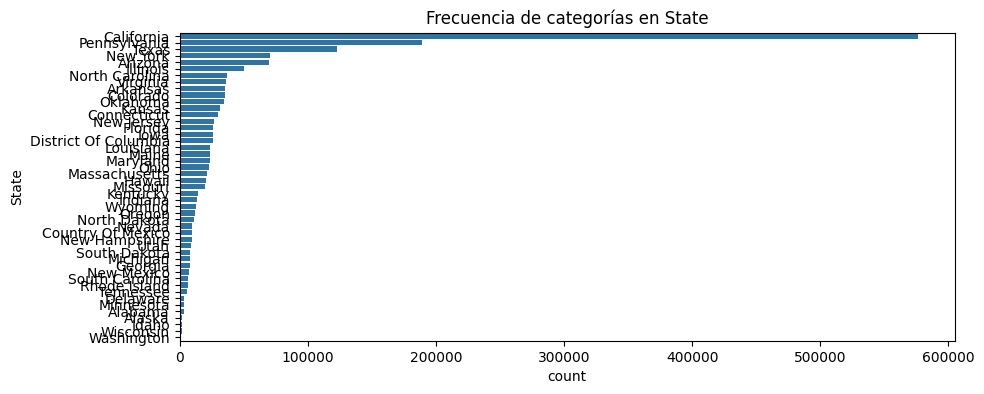

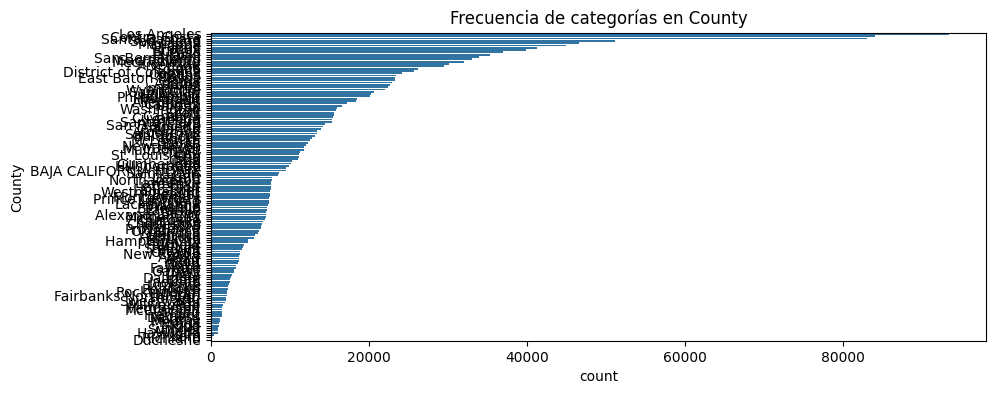

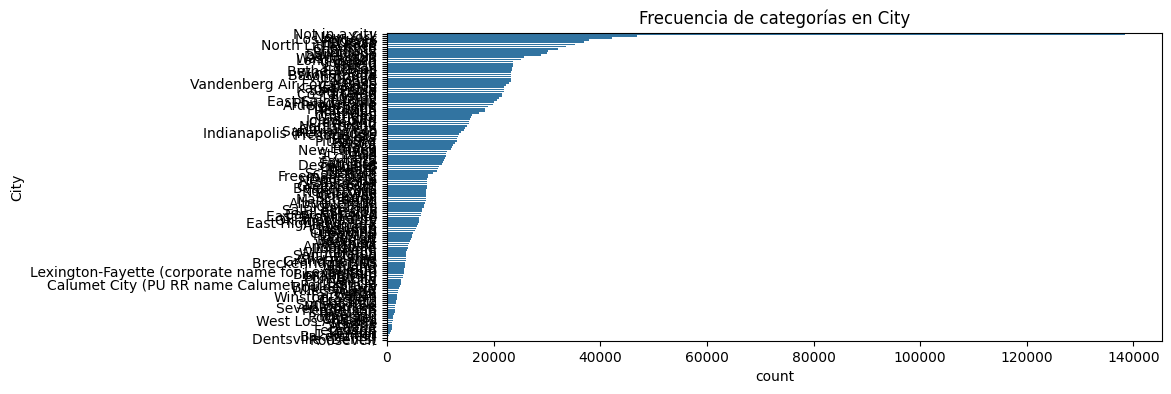

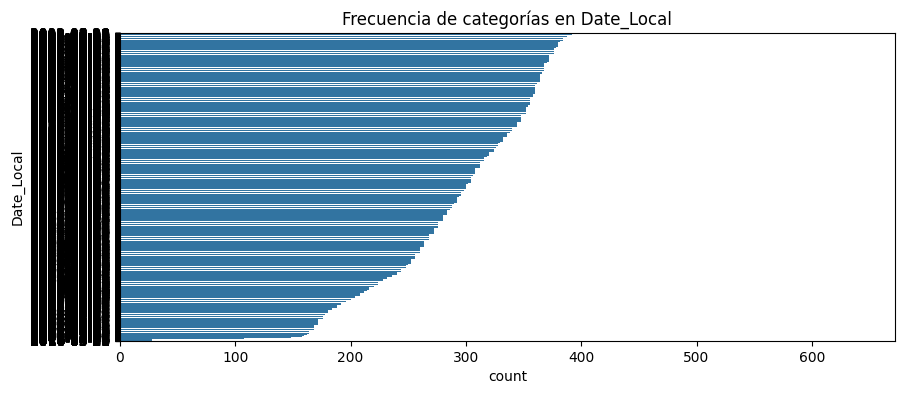

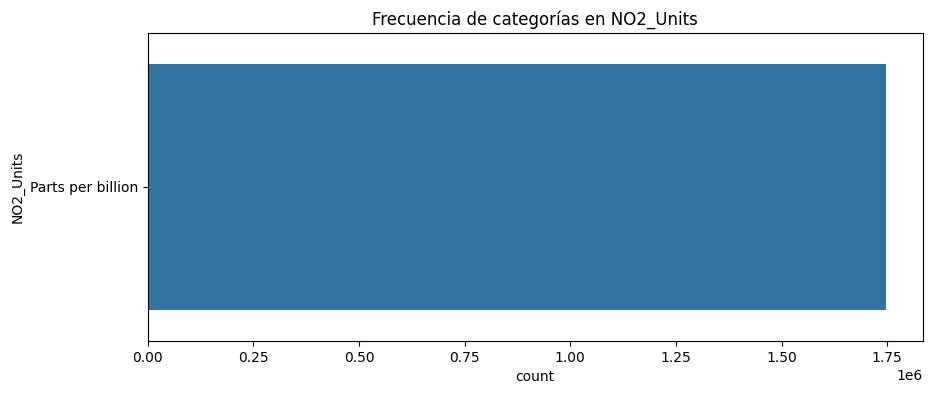

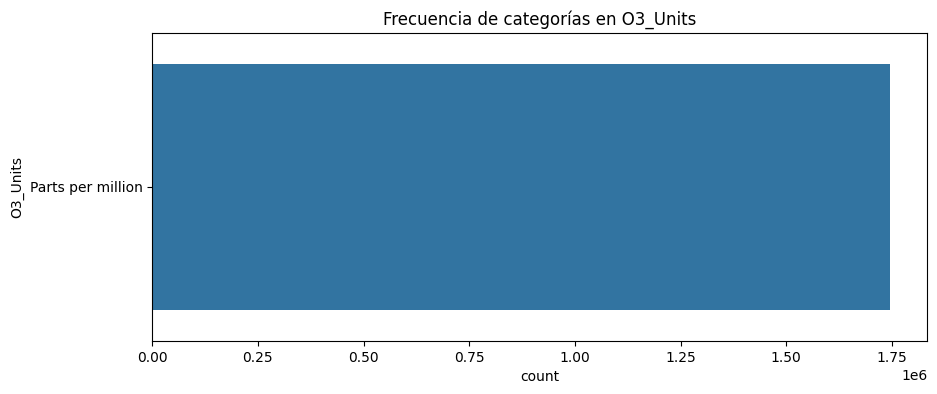

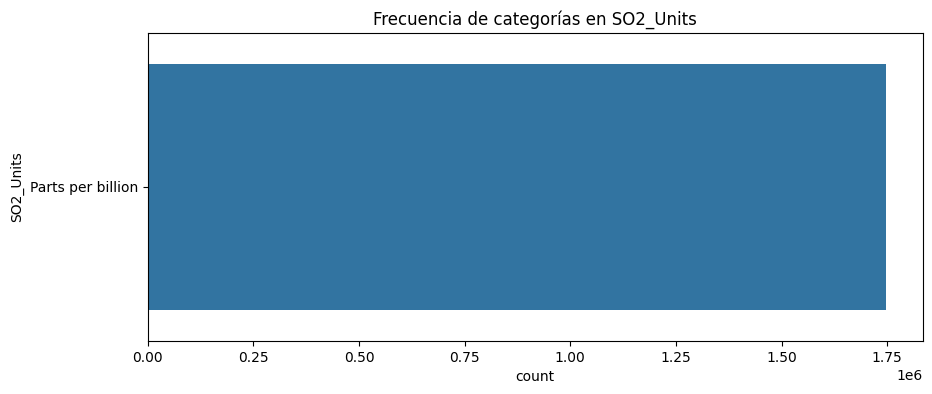

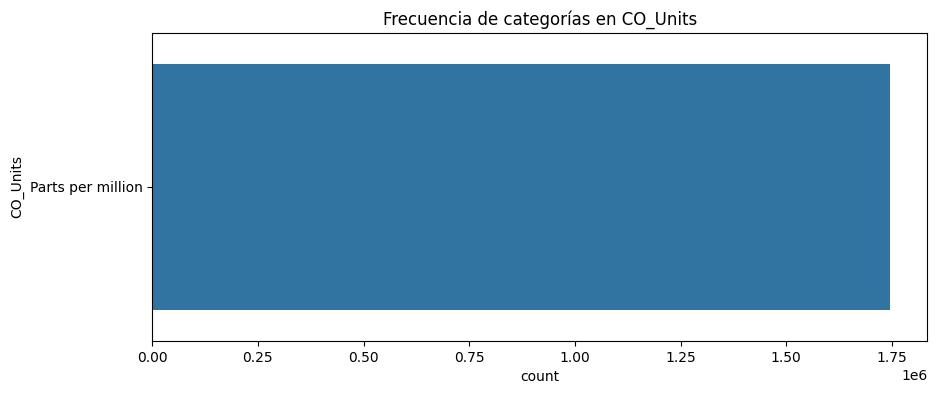

In [7]:
#Gr√°ficos para las variables num√©ricas
for col in numeric_cols:
    # Creamos una figura con dos gr√°ficos: histograma y boxplot
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Histograma para ver la distribuci√≥n
    sns.histplot(df[col].dropna(), bins=30, ax=axes[0], kde=True)
    axes[0].set_title(f"Distribuci√≥n de {col}")

    # Boxplot para detectar posibles outliers
    sns.boxplot(x=df[col], ax=axes[1])
    axes[1].set_title(f"Boxplot de {col}")

    plt.tight_layout()
    plt.show()

# Gr√°ficos para las variables categ√≥ricas
for col in categorical_cols:
    # Creamos un gr√°fico de barras (countplot) para ver la frecuencia de cada categor√≠a
    plt.figure(figsize=(10, 4))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f"Frecuencia de categor√≠as en {col}")
    plt.show()

Tras mucho tiempo de analisis en informes citados en la bibliografia he llegado a la conclusion que la variable objetivo ser√°: O3_AQI (√çndice de Calidad del Aire del Ozono). En primer lugar, el AQI es una m√©trica estandarizada y directamente interpretable, utilizada por organismos de salud p√∫blica y medio ambiente para comunicar la calidad del aire de forma clara y comprensible. A diferencia de las concentraciones brutas (O3_Mean, O3_1st_Max_Value), el AQI ya incorpora umbrales sanitarios y criterios normativos que permiten traducir las mediciones en un impacto directo sobre la salud de la poblaci√≥n.

Adem√°s, el ozono troposf√©rico es uno de los contaminantes m√°s relevantes en entornos urbanos e industriales, asociado a fen√≥menos de esmog y a problemas respiratorios, lo cual refuerza su valor como indicador clave de la calidad del aire. En comparaci√≥n con otras opciones. Ademas ofrece un reto predictivo interesante y al mismo tiempo una mayor utilidad pr√°ctica.

#Requisitos T√©cnicos del Sistema ML

**M√©trica de evaluaci√≥n:** MAE  
**Precisi√≥n m√≠nima aceptable:** MAE ‚â§ 5.0  
**Precisi√≥n deseable:** MAE ‚â§ 3.0  
**CPU m√°xima:** 4 cores  
**RAM m√°xima:** 18 GB  
**Tiempo m√°x. de entrenamiento:** 10 minutos  
**Dependencias:**
- numpy==1.24.3
- pandas==2.1.0
- scikit-learn==1.3.2
- seaborn==0.12.2


# An√°lisis de outliers.
A continuacion haremos un analisis de outliers para comprender esos valores extremos y determinar si son errores, son eventos raros pero validos o si pueden afectar negativamente

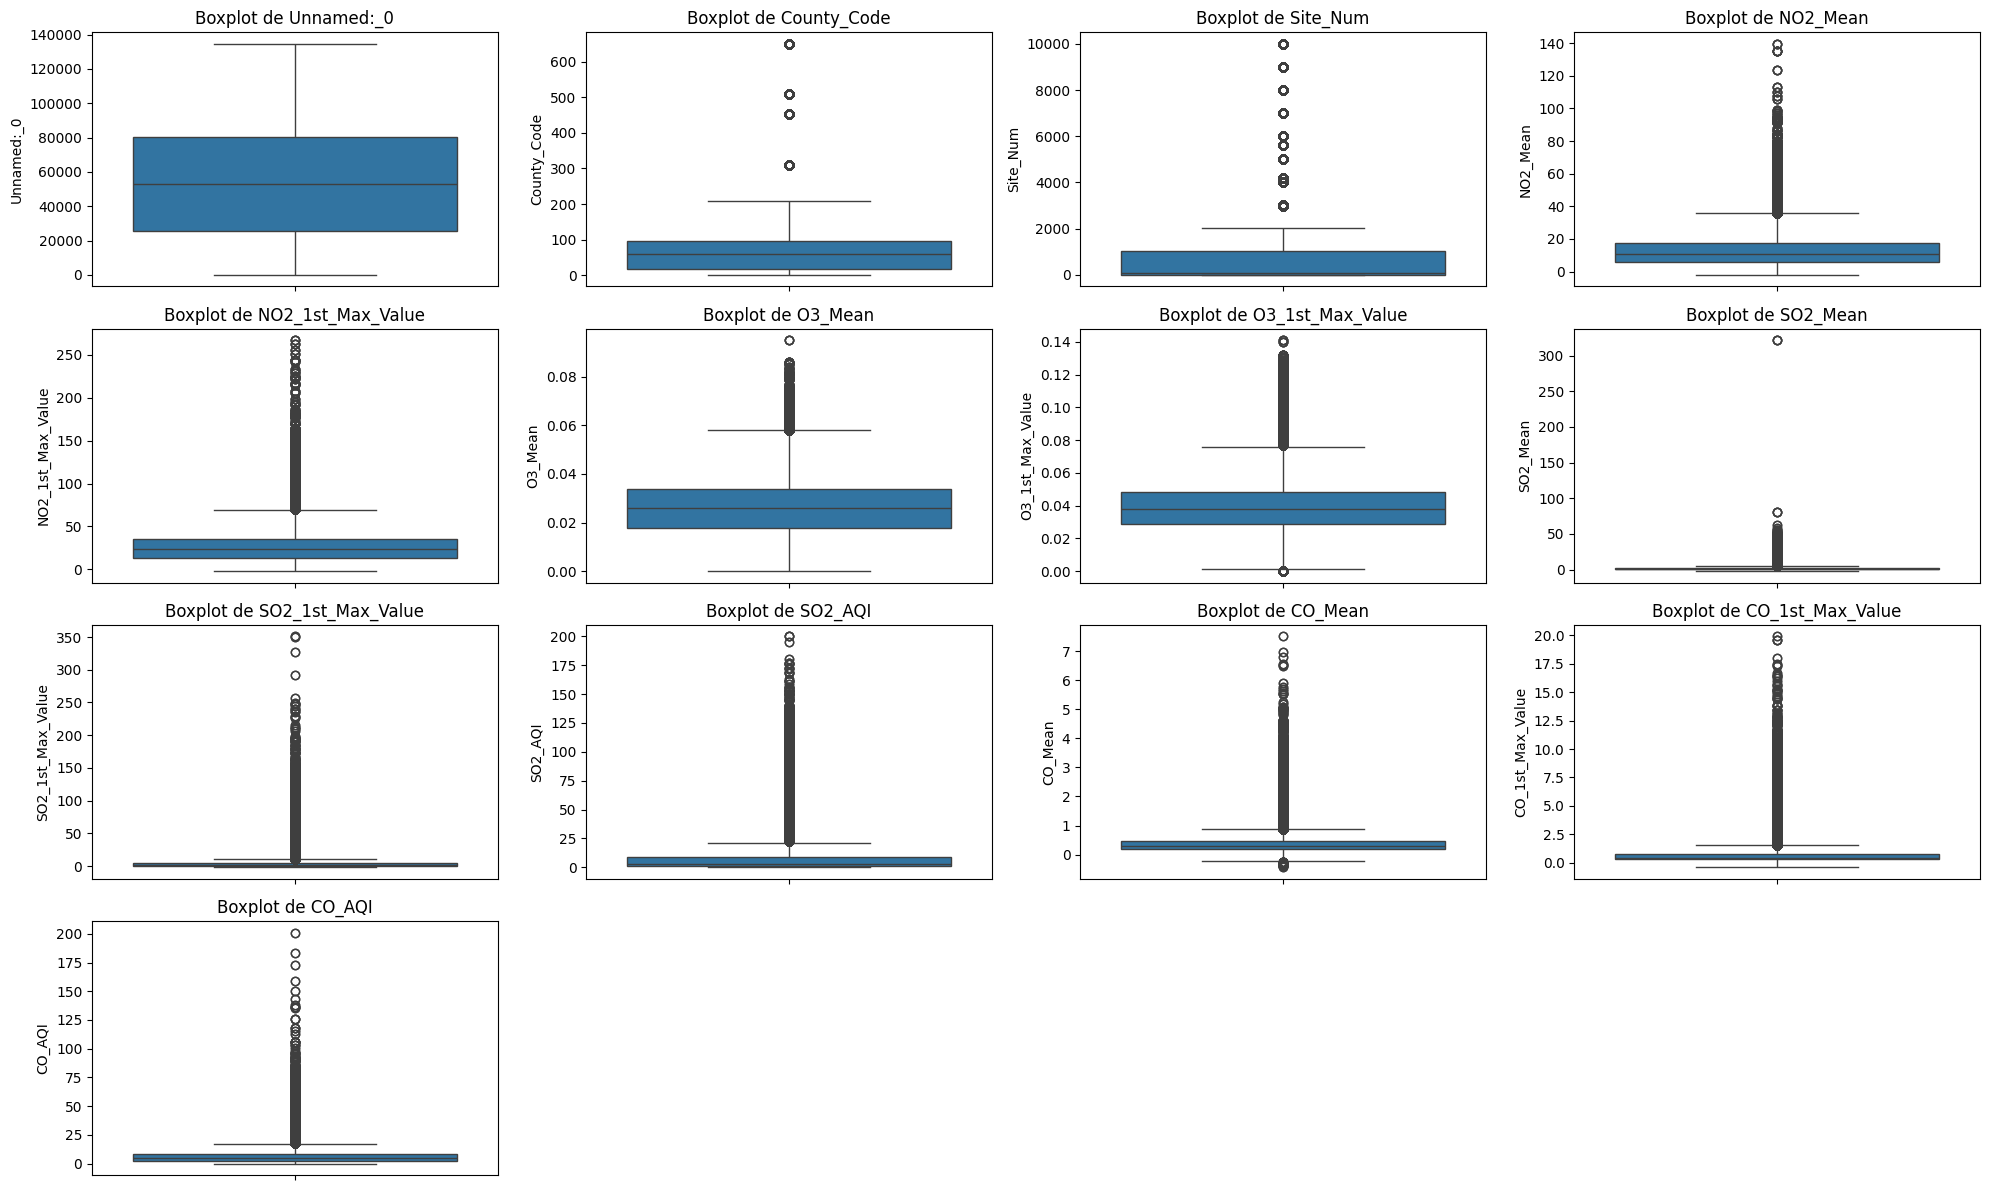

In [8]:
#Para hacer el an√°lisis de outliers emplearemos boxplots
plt.figure(figsize=(20, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot de {col}")
plt.tight_layout()
plt.show()

Tras realizar un an√°lisis exploratorio mediante diagramas de caja, se observa que la mayor√≠a de las variables num√©ricas del dataset presentan una distribuci√≥n muy concentrada en valores bajos, con una cantidad significativa de valores at√≠picos (outliers) hacia valores altos. Esto indica que, aunque la contaminaci√≥n en general se mantiene en rangos bajos o moderados, existen episodios puntuales con niveles mucho m√°s elevados. Este comportamiento es esperado en datos medioambientales, donde eventos de alta contaminaci√≥n pueden ser espor√°dicos y localizados. Por ello, se trabajar√° se tendr√° en cuenta y se continuara con la limpieza de datos y cuando este por acabar y los datos ya esten casi listos se hara limpieza de outliers para no duplicar codigo.

# Analisis de valores nulos

Vamos a identificar las columnas con valores nulos en un DataFrame que puede contener columnas en formato sparse y denso, para ello convertiremos solo las columnas sparse a formato denso temporalmente y as√≠ evitar errores al contar los nulos. Luego, seleccionaremos las columnas num√©ricas que tienen valores faltantes para aplicar imputaci√≥n usando la media con SimpleImputer, manteniendo las columnas no num√©ricas sin cambios. Finalmente, actualizaremos el DataFrame original con los valores imputados y mostraremos un resumen estad√≠stico junto con gr√°ficos de caja para analizar la distribuci√≥n de algunas columnas seleccionadas. Este proceso permite manejar eficientemente datos dispersos y completos sin perder informaci√≥n ni generar advertencias.

In [9]:
for col in df.columns:
    if pd.api.types.is_sparse(df[col]) and pd.api.types.is_numeric_dtype(df[col]):
        df[col] = df[col].sparse.to_dense()

# Paso 1: Contar valores nulos sin warnings
na_counts = df.isna().sum()
cols_with_na = na_counts[na_counts > 0].index.tolist()

print("Columnas con valores nulos y su conteo:")
print(na_counts[na_counts > 0])

<ipython-input-9-a7d2155a20b5>:2: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if pd.api.types.is_sparse(df[col]) and pd.api.types.is_numeric_dtype(df[col]):


Columnas con valores nulos y su conteo:
SO2_AQI    872907
CO_AQI     873323
dtype: int64


         Unnamed:_0    State_Code   County_Code      Site_Num      NO2_Mean  \
count  1.746661e+06  1.746661e+06  1.746661e+06  1.746661e+06  1.746661e+06   
mean   5.471414e+04  2.230907e+01  7.169381e+01  1.118214e+03  1.282193e+01   
std    3.372908e+04  1.725621e+01  7.948023e+01  2.003103e+03  9.504814e+00   
min    0.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00 -2.000000e+00   
25%    2.575300e+04  6.000000e+00  1.700000e+01  9.000000e+00  5.750000e+00   
50%    5.304500e+04  1.700000e+01  5.900000e+01  6.000000e+01  1.073913e+01   
75%    8.033600e+04  4.000000e+01  9.700000e+01  1.039000e+03  1.771364e+01   
max    1.345750e+05  8.000000e+01  6.500000e+02  9.997000e+03  1.395417e+02   

       NO2_1st_Max_Value  NO2_1st_Max_Hour       NO2_AQI       O3_Mean  \
count       1.746661e+06      1.746661e+06  1.746661e+06  1.746661e+06   
mean        2.541485e+01      1.173102e+01  2.389822e+01  2.612485e-02   
std         1.599963e+01      7.877501e+00  1.516280e+01  1.136974

<Axes: >

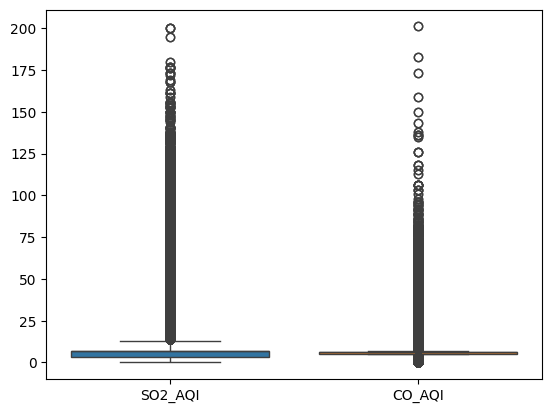

In [10]:
# Imputar valores faltantes en columnas num√©ricas
numeric_cols = df.select_dtypes(include=["number"]).columns
numeric_cols_with_na = [col for col in numeric_cols if col in cols_with_na]

if len(numeric_cols_with_na) > 0:
    imputer = SimpleImputer(strategy= "mean")
    df_numeric_imputed_array = imputer.fit_transform(df[numeric_cols_with_na])
    df_numeric_imputed = pd.DataFrame(df_numeric_imputed_array, columns=numeric_cols_with_na)
    df.loc[:, numeric_cols_with_na] = df_numeric_imputed
else:
    print("No hay columnas num√©ricas con valores nulos para imputar.")

# Mostrar resumen estad√≠stico y boxplots
print(df.describe())

boxplot_columns = ["SO2_AQI", "CO_AQI"]
sns.boxplot(data=df[boxplot_columns])

La columna "None" no se elimina con el c√≥digo de imputaci√≥n porque dicha operaci√≥n solo afecta a columnas num√©ricas, mientras que "None" es una columna no num√©rica que permanece intacta y con valores nulos. Por lo tanto, los valores faltantes en esa columna siguen presentes despu√©s del proceso. Por lo que la eliminaremos directamente

In [11]:
df.columns

Index(['Unnamed:_0', 'State_Code', 'County_Code', 'Site_Num', 'Address',
       'State', 'County', 'City', 'Date_Local', 'NO2_Units', 'NO2_Mean',
       'NO2_1st_Max_Value', 'NO2_1st_Max_Hour', 'NO2_AQI', 'O3_Units',
       'O3_Mean', 'O3_1st_Max_Value', 'O3_1st_Max_Hour', 'O3_AQI', 'SO2_Units',
       'SO2_Mean', 'SO2_1st_Max_Value', 'SO2_1st_Max_Hour', 'SO2_AQI',
       'CO_Units', 'CO_Mean', 'CO_1st_Max_Value', 'CO_1st_Max_Hour', 'CO_AQI'],
      dtype='object')

In [12]:
if "None" in df.columns:
    df.drop(columns=["None"], inplace=True)
    print('Columna "None" eliminada.')
else:
    print('La columna "None" no existe en el DataFrame.')

# Ahora comprobar si siguen habiendo valores nulos
print(df.isna().any().any())
print(df.isna().sum()[df.isna().sum() > 0])


La columna "None" no existe en el DataFrame.
False
Series([], dtype: int64)


# Analisis de columnas categoricas

Se realizar√° un an√°lisis de las columnas categ√≥ricas presentes en el DataFrame para entender su estructura y contenido. Primero se identificar√°n las columnas de tipo objeto que suelen representar variables categ√≥ricas. Luego se inspeccionar√°n los tipos de datos que contienen para asegurar consistencia y detectar posibles valores at√≠picos o inconsistentes. Tambi√©n se analizar√° el n√∫mero de categor√≠as √∫nicas en cada columna y se mostrar√°n ejemplos representativos de sus valores. Este an√°lisis es fundamental para decidir c√≥mo limpiar, transformar o codificar estas variables para su posterior uso en modelos de machine learning.

In [13]:
categorical_cols_clean = df.select_dtypes(include=['object']).columns
print("Caracter√≠sticas categ√≥ricas analizadas:", list(categorical_cols_clean))
print()

# De esta manera nos aseguramos que las columnas categoricas con str
for col in categorical_cols:
    tipos = df[col].map(type).unique()
    print(f"{col}: tipos de datos encontrados -> {tipos}")

# De esta manera nos haremos una idea de lo que hay en cada columna
for col in categorical_cols:
    print(f"\n{col}:")
    print(f"- N√∫mero de categor√≠as √∫nicas: {df[col].nunique()}")
    print(f"- Ejemplos de valores: {df[col].unique()[:10]}")

Caracter√≠sticas categ√≥ricas analizadas: ['Address', 'State', 'County', 'City', 'Date_Local', 'NO2_Units', 'O3_Units', 'SO2_Units', 'CO_Units']

Address: tipos de datos encontrados -> [<class 'str'>]
State: tipos de datos encontrados -> [<class 'str'>]
County: tipos de datos encontrados -> [<class 'str'>]
City: tipos de datos encontrados -> [<class 'str'>]
Date_Local: tipos de datos encontrados -> [<class 'str'>]
NO2_Units: tipos de datos encontrados -> [<class 'str'>]
O3_Units: tipos de datos encontrados -> [<class 'str'>]
SO2_Units: tipos de datos encontrados -> [<class 'str'>]
CO_Units: tipos de datos encontrados -> [<class 'str'>]

Address:
- N√∫mero de categor√≠as √∫nicas: 204
- Ejemplos de valores: ['1645 E ROOSEVELT ST-CENTRAL PHOENIX STN'
 '2857 N MILLER RD-S SCOTTSDALE STN' '1237 S. BEVERLY , TUCSON'
 '2956-A TREAT BOULEVARD' '5551 BETHEL ISLAND RD'
 'UNIT 759 EL PORTAL SHOPPING CENTER, San Pablo'
 '583 W. 10TH ST., PITTSBURG' '1029 ETHEL ST, CALEXICO HIGH SCHOOL'
 '5558 Cali

Se eliminar√°n primero las columnas que indican las unidades de medida, ya que no aportan informaci√≥n directa para el modelo y pueden confundir si se dejan. Estas columnas usualmente terminan con _Units.

In [14]:
# Columnas que est√°n originalmente en ppm ‚Üí convertir a ppb
ppm_cols = [
    'O3_Mean', 'O3_1st_Max_Value', 'O3_1st_Max_Hour', 'O3_AQI',
    'CO_Mean', 'CO_1st_Max_Value', 'CO_1st_Max_Hour', 'CO_AQI'
]

# Convertir a tipo m√°s amplio para evitar overflow
df[ppm_cols] = df[ppm_cols].astype('float64')

# Aplicar conversi√≥n
df[ppm_cols] = df[ppm_cols] * 1000

print("Conversi√≥n a ppb completada sin errores.")

Conversi√≥n a ppb completada sin errores.


In [15]:
# Eliminar columnas que indican unidades (terminan con '_Units')
unit_cols = [col for col in df.columns if col.endswith("_Units")]
for col in unit_cols:
    print(f"Eliminando columna: {col}")
df.drop(columns=unit_cols, inplace=True)

Eliminando columna: NO2_Units
Eliminando columna: O3_Units
Eliminando columna: SO2_Units
Eliminando columna: CO_Units


A continuaci√≥n, se procesar√° el DataFrame df para extraer informaci√≥n temporal de la columna 'Date_Local', creando nuevas columnas con el a√±o, mes y d√≠a de la semana, siempre que esta columna exista. Despu√©s, se eliminar√°n las columnas 'Date_Local' y 'Address' si est√°n presentes, para limpiar el dataset.
Se elimina la columna "Address" porque es muy espec√≠fica y detallada, mientras que ya contamos con otras columnas geogr√°ficas como "State", "County" y "City" que resumen suficientemente la ubicaci√≥n para el an√°lisis.

In [16]:
# Solo crear las columnas si "Date_Local" existe
if "Date_Local" in df.columns:
    df["year"] = pd.to_datetime(df["Date_Local"]).dt.year
    df["month"] = pd.to_datetime(df["Date_Local"]).dt.month
    df["weekday"] = pd.to_datetime(df["Date_Local"]).dt.weekday
else:
    print("Date_Local ya estaba borrado, no se crearon year, month ni weekday.")

# Ahora intentamos eliminar "Date_Local" y "Address" solo si existen
cols_to_drop = []
if "Date_Local" in df.columns:
    cols_to_drop.append("Date_Local")
else:
    print("Date_Local ya estaba borrado.")

if "Address" in df.columns:
    cols_to_drop.append("Address")
else:
    print("Address ya estaba borrado.")

# Eliminamos las columnas que existan
if cols_to_drop:
    df.drop(columns=cols_to_drop, inplace=True)

# Comprobamos las columnas resultantes
print("Columnas finales en df:")
print(df.columns)


Columnas finales en df:
Index(['Unnamed:_0', 'State_Code', 'County_Code', 'Site_Num', 'State',
       'County', 'City', 'NO2_Mean', 'NO2_1st_Max_Value', 'NO2_1st_Max_Hour',
       'NO2_AQI', 'O3_Mean', 'O3_1st_Max_Value', 'O3_1st_Max_Hour', 'O3_AQI',
       'SO2_Mean', 'SO2_1st_Max_Value', 'SO2_1st_Max_Hour', 'SO2_AQI',
       'CO_Mean', 'CO_1st_Max_Value', 'CO_1st_Max_Hour', 'CO_AQI', 'year',
       'month', 'weekday'],
      dtype='object')


# Correlacion de caracteristicas

Primero, se reordenan los datos aleatoriamente para evitar sesgos por el orden original en que estaban organizados. Luego, se realiza un resumen estad√≠stico para entender las caracter√≠sticas principales de cada variable y visualizar sus distribuciones, lo cual ayuda a detectar posibles problemas como valores at√≠picos. A continuaci√≥n, se calcula una matriz de correlaci√≥n que permite identificar qu√© variables est√°n m√°s relacionadas entre s√≠ y, especialmente, con la variable objetivo, facilitando as√≠ la selecci√≥n de caracter√≠sticas relevantes. Finalmente, el conjunto de datos se divide en subsets de entrenamiento, validaci√≥n y prueba, o alternativamente se utiliza un esquema de validaci√≥n cruzada (como K-fold) para asegurar que los modelos sean evaluados de forma robusta y generalizable.

         Unnamed:_0    State_Code   County_Code      Site_Num      NO2_Mean  \
count  1.746661e+06  1.746661e+06  1.746661e+06  1.746661e+06  1.746661e+06   
mean   5.471414e+04  2.230907e+01  7.169381e+01  1.118214e+03  1.282193e+01   
std    3.372908e+04  1.725621e+01  7.948023e+01  2.003103e+03  9.504814e+00   
min    0.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00 -2.000000e+00   
25%    2.575300e+04  6.000000e+00  1.700000e+01  9.000000e+00  5.750000e+00   
50%    5.304500e+04  1.700000e+01  5.900000e+01  6.000000e+01  1.073913e+01   
75%    8.033600e+04  4.000000e+01  9.700000e+01  1.039000e+03  1.771364e+01   
max    1.345750e+05  8.000000e+01  6.500000e+02  9.997000e+03  1.395417e+02   

       NO2_1st_Max_Value  NO2_1st_Max_Hour       NO2_AQI       O3_Mean  \
count       1.746661e+06      1.746661e+06  1.746661e+06  1.746661e+06   
mean        2.541485e+01      1.173102e+01  2.389822e+01  2.612485e+01   
std         1.599963e+01      7.877501e+00  1.516280e+01  1.136974

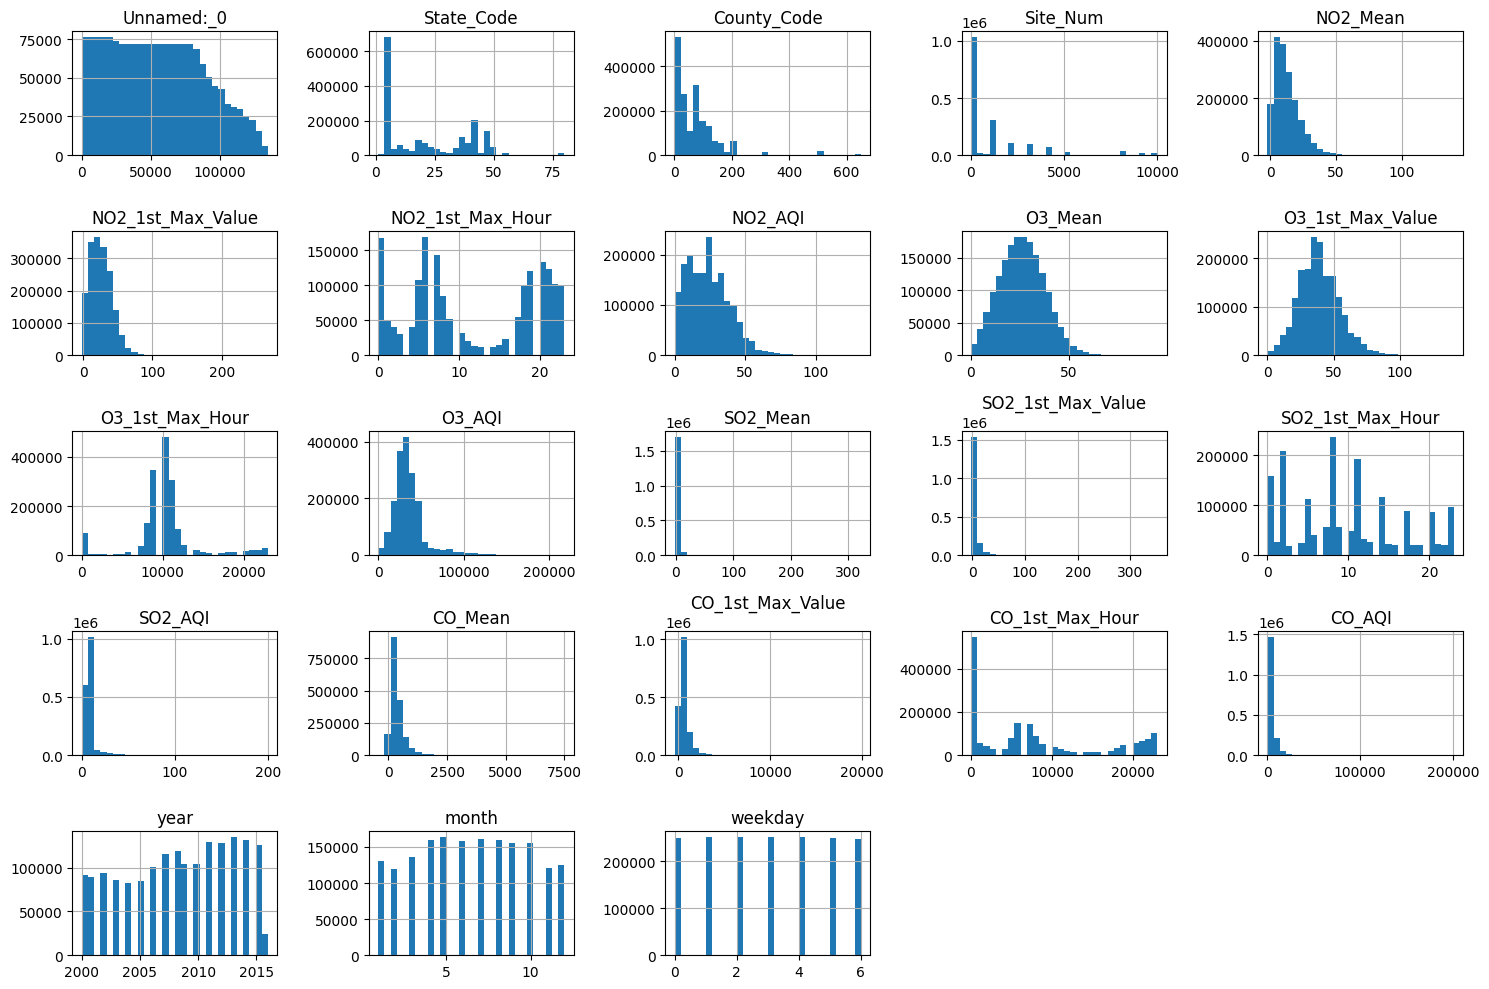

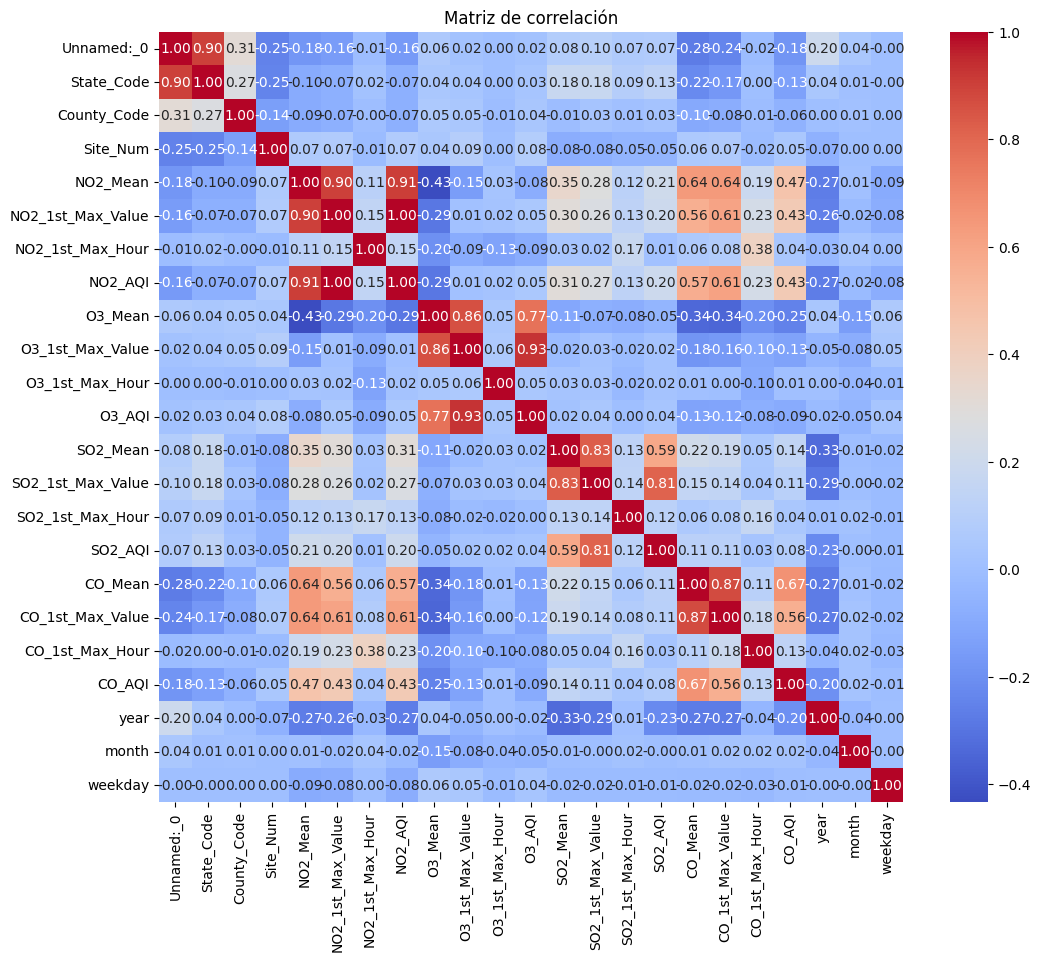

In [17]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
print(df.describe())

df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

corr_matrix = df.select_dtypes(include=["number"]).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlaci√≥n")
plt.show()


Se eliminar√° la columna "Unnamed:_0" porque su nombre sugiere que es un √≠ndice autom√°tico generado al exportar o importar los datos (por ejemplo, al leer un archivo CSV), y no aporta informaci√≥n relevante para el an√°lisis ni para el modelado. Mantenerla solo a√±adir√≠a ruido al dataset. De todas forma ahora se comprobr√° si de verdad es un indice:

In [18]:
if "Unnamed:_0" in df.columns:
    print("Valores √∫nicos en 'Unnamed:_0':")
    print(df["Unnamed:_0"].unique())

    df.drop(columns=["Unnamed:_0"], inplace=True)
    print("\nColumna 'Unnamed:_0' eliminada.")
else:
    print("La columna 'Unnamed:_0' no existe en el DataFrame.")

print("\nColumnas finales en el DataFrame:")
print(df.columns)

Valores √∫nicos en 'Unnamed:_0':
[ 44403  15612  12092 ... 132237 133971 133932]

Columna 'Unnamed:_0' eliminada.

Columnas finales en el DataFrame:
Index(['State_Code', 'County_Code', 'Site_Num', 'State', 'County', 'City',
       'NO2_Mean', 'NO2_1st_Max_Value', 'NO2_1st_Max_Hour', 'NO2_AQI',
       'O3_Mean', 'O3_1st_Max_Value', 'O3_1st_Max_Hour', 'O3_AQI', 'SO2_Mean',
       'SO2_1st_Max_Value', 'SO2_1st_Max_Hour', 'SO2_AQI', 'CO_Mean',
       'CO_1st_Max_Value', 'CO_1st_Max_Hour', 'CO_AQI', 'year', 'month',
       'weekday'],
      dtype='object')


In [19]:
target_corr = corr_matrix["O3_AQI"].sort_values(ascending=False)
print(target_corr)

O3_AQI               1.000000
O3_1st_Max_Value     0.931867
O3_Mean              0.768771
Site_Num             0.083351
NO2_AQI              0.049027
NO2_1st_Max_Value    0.048743
O3_1st_Max_Hour      0.048395
SO2_1st_Max_Value    0.044307
County_Code          0.040689
SO2_AQI              0.036757
weekday              0.036273
State_Code           0.033527
Unnamed:_0           0.017080
SO2_Mean             0.015523
SO2_1st_Max_Hour     0.000883
year                -0.019809
month               -0.047594
CO_1st_Max_Hour     -0.078250
NO2_Mean            -0.082361
NO2_1st_Max_Hour    -0.086782
CO_AQI              -0.091990
CO_1st_Max_Value    -0.120001
CO_Mean             -0.129736
Name: O3_AQI, dtype: float64


La correlaci√≥n de Pearson muestra una relaci√≥n muy alta entre O3_AQI y las variables O3_1st_Max_Value y O3_Mean porque O3_AQI se calcula directamente a partir de estos valores. Esto significa que estas columnas contienen informaci√≥n casi id√©ntica a la variable objetivo, por lo que un modelo entrenado con ellas tender√° a aprender simplemente a replicar ese c√°lculo, limitando su capacidad para generalizar y detectar patrones adicionales en otras variables.

In [20]:
df.drop(columns=["O3_1st_Max_Value", "O3_Mean"], inplace=True)
print("Columnas 'O3_1st_Max_Value' y 'O3_Mean' eliminadas.")
print("Columnas actuales en el DataFrame:")
print(df.columns)

Columnas 'O3_1st_Max_Value' y 'O3_Mean' eliminadas.
Columnas actuales en el DataFrame:
Index(['State_Code', 'County_Code', 'Site_Num', 'State', 'County', 'City',
       'NO2_Mean', 'NO2_1st_Max_Value', 'NO2_1st_Max_Hour', 'NO2_AQI',
       'O3_1st_Max_Hour', 'O3_AQI', 'SO2_Mean', 'SO2_1st_Max_Value',
       'SO2_1st_Max_Hour', 'SO2_AQI', 'CO_Mean', 'CO_1st_Max_Value',
       'CO_1st_Max_Hour', 'CO_AQI', 'year', 'month', 'weekday'],
      dtype='object')


# Prepocesamiento de datos numericos y categoricos

Dado que la columna State tiene un n√∫mero manejable de categor√≠as (47), aplicar One-Hot Encoding es una buena opci√≥n para convertir cada estado en una columna binaria sin perder informaci√≥n. Esto permite que el modelo interprete cada estado como una caracter√≠stica independiente.

Por otro lado, County y City tienen muchas m√°s categor√≠as (133 y 144 respectivamente), lo que har√≠a que One-Hot Encoding genere demasiadas columnas, aumentando la dimensionalidad y el riesgo de sobreajuste. Para estas variables, usamos Frequency Encoding, que reemplaza cada categor√≠a por la frecuencia con la que aparece en el dataset. Esto reduce la dimensionalidad y permite al modelo captar la importancia relativa de cada categor√≠a sin explotar la cantidad de columnas.

In [21]:
# One-Hot Encoding para 'State'
df = pd.get_dummies(df, columns=["State"], drop_first=True)

# Convertir columnas booleanas de 'State_' a 0/1
state_cols = [col for col in df.columns if col.startswith("State_")]
df[state_cols] = df[state_cols].astype(int)

# Frequency Encoding para 'County' y 'City'
for col in ["County", "City"]:
    freq_encoding = df[col].value_counts(normalize=True)
    df[col + "_freq_enc"] = df[col].map(freq_encoding)

# Eliminamos las columnas originales 'County' y 'City' tras la codificaci√≥n
df.drop(columns=["County", "City"], inplace=True)

# Verificamos las nuevas columnas
print(df.filter(regex="State_|_freq_enc").head())

   State_Code  State_Alaska  State_Arizona  State_Arkansas  State_California  \
0           8             0              0               0                 0   
1           6             0              0               0                 1   
2           6             0              0               0                 1   
3          42             0              0               0                 0   
4           6             0              0               0                 1   

   State_Colorado  State_Connecticut  State_Country Of Mexico  State_Delaware  \
0               1                  0                        0               0   
1               0                  0                        0               0   
2               0                  0                        0               0   
3               0                  0                        0               0   
4               0                  0                        0               0   

   State_District Of Columbia  .

In [22]:
# Comprobacion de que las columnas ya estan con los cambios aplicados
df.head()

State_Code  County_Code  Site_Num   NO2_Mean  NO2_1st_Max_Value  \
0           8            1      3001  22.652174               43.0   
1           6           23      1004   1.237500                2.8   
2           6           19         8   8.956522               18.0   
3          42           17        12  16.625000               34.0   
4           6           23      1004   1.661111                2.7   

   NO2_1st_Max_Hour  NO2_AQI  O3_1st_Max_Hour    O3_AQI  SO2_Mean  ...  \
0                 7       41          10000.0   61000.0  2.000000  ...   
1                 9        2          16000.0   36000.0 -0.079167  ...   
2                 5       17           9000.0  119000.0  3.457143  ...   
3                18       32              0.0   36000.0  2.541667  ...   
4                13        2          10000.0   33000.0 -0.460000  ...   

   State_South Dakota  State_Tennessee  State_Texas  State_Utah  \
0                   0                0            0           0   
1                   0                0            0           0   
2                   0                0            0           0   
3                   0                0            0           0   
4                   0                0            0           0   

   State_Virginia  State_Washington  State_Wisconsin  State_Wyoming  \
0               0                 0                0              0   
1               0                 0                0              0   
2               0                 0                0              0   
3               0                 0                0              0   
4               0                 0                0              0   

   County_freq_enc  City_freq_enc  
0         0.013124       0.012009  
1         0.010618       0.006985  
2         0.008761       0.008761  
3         0.007327       0.007327  
4         0.010618       0.006985  

[5 rows x 68 columns]

In [23]:
# Revisi√≥n general
print("¬øEl DataFrame tiene alg√∫n nulo?")
print(df.isnull().values.any())

print("¬øEl DataFrame tiene alg√∫n NaN?")
print(df.isna().values.any())

¬øEl DataFrame tiene alg√∫n nulo?
False
¬øEl DataFrame tiene alg√∫n NaN?
False


# Modelo base
Ahora se aplica bucketizaci√≥n porque vamos a entrenar un modelo de regresi√≥n lineal.
La regresi√≥n lineal solo puede capturar relaciones lineales entre las variables y el objetivo.
Si las variables tienen efectos no lineales o por rangos, el modelo no los detectar√° bien.
Al bucketizar, transformamos las variables continuas en categor√≠as discretas seg√∫n rangos espec√≠ficos.
Esto permite que la regresi√≥n lineal capture cambios de efecto por tramos, simulando una relaci√≥n no lineal simple.
Adem√°s, reduce el impacto de valores extremos que podr√≠an sesgar la l√≠nea de regresi√≥n.
As√≠, mejoramos la capacidad del modelo lineal para ajustarse a datos con patrones m√°s complejos sin usar polinomios o modelos m√°s complicados.

In [ ]:
# Copia del dataset original
df_binned = df.copy()

# Bucketizaci√≥n ajustando din√°micamente los bins
for col in ["NO2_1st_Max_Value", "SO2_1st_Max_Value", "CO_1st_Max_Value"]:
    max_val = df_binned[col].max()
    bins = [0, 10, 20, 30, 40, 50, 100]
    if max_val > 100:
        bins.append(max_val + 1)  # agregar bin superior si es necesario

    df_binned[f"{col}_bin"] = pd.cut(df_binned[col], bins=bins, labels=False, include_lowest=True)

# Verificar si quedaron NaNs despu√©s del corte (opcional, de diagn√≥stico)
for col in ["NO2_1st_Max_Value", "SO2_1st_Max_Value", "CO_1st_Max_Value"]:
    num_na = df_binned[f"{col}_bin"].isnull().sum()
    print(f"{col}_bin tiene {num_na} NaNs")

# Opcional: llenar cualquier NaN restante con un valor especial (ej. -1)
df_binned.fillna(-1, inplace=True)

# Preparar X e y
X = df_binned.drop(columns=["O3_AQI"])
y = df_binned["O3_AQI"]

# Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

NO2_1st_Max_Value_bin tiene 184 NaNs
SO2_1st_Max_Value_bin tiene 8286 NaNs
CO_1st_Max_Value_bin tiene 198 NaNs


**Regresi√≥n lineal:**

Se usa cuando asumimos que la relaci√≥n entre las variables independientes y la dependiente es lineal, simple de interpretar y r√°pida de entrenar.
Permite entender f√°cilmente el efecto de cada variable sobre el objetivo a trav√©s de sus coeficientes.

In [ ]:
# Entrenar modelo lineal
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predecir
y_pred = model.predict(X_test_scaled)

# Evaluar
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE (Error cuadr√°tico medio): {mse:.2f}")
print(f"R2 (Coeficiente de determinaci√≥n): {r2:.4f}")


MSE (Error cuadr√°tico medio): 330661140.60
R2 (Coeficiente de determinaci√≥n): 0.1632


En los resultados, un R¬≤ bajo (~0.16) indica que el modelo solo explica una peque√±a parte de la variabilidad del O3_AQI.
Esto puede deberse a relaciones no lineales que la regresi√≥n lineal no capta, o a la presencia de ruido y variables irrelevantes.
Es √∫til como l√≠nea base porque permite comparar modelos m√°s avanzados frente a un enfoque sencillo.
Sin embargo, su capacidad predictiva suele ser limitada en datasets con relaciones complejas.
La interpretaci√≥n directa de los coeficientes puede ser enga√±osa si las variables est√°n correlacionadas (multicolinealidad).

**HistGradientBoostingRegressor:**

Despu√©s de entrenar la regresi√≥n lineal, que obtuvo un R¬≤ bajo (0.16), se opta por usar HistGradientBoostingRegressor para mejorar el desempe√±o.

Esto se debe a que la regresi√≥n lineal solo captura relaciones lineales y no modela interacciones ni efectos no lineales entre variables.

El HistGradientBoostingRegressor, al ser un modelo basado en √°rboles y boosting, puede detectar patrones complejos y no lineales que la regresi√≥n lineal no puede capturar.

Por eso, es adecuado para aumentar la precisi√≥n y explicar mejor la variabilidad del target cuando la regresi√≥n lineal se queda corta.

In [ ]:
X = df.drop(columns=["O3_AQI"])
y = df["O3_AQI"]

# Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = HistGradientBoostingRegressor(max_iter=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
# Calcular m√©tricas
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir resultados
print(f"MSE (Error cuadr√°tico medio): {mse:.2f}")
print(f"R2 (Coeficiente de determinaci√≥n): {r2:.4f}")

MSE (Error cuadr√°tico medio): 176618191.40
R2 (Coeficiente de determinaci√≥n): 0.5530


En los resultados, un R¬≤ mucho mejor (~0.55) muestra que el modelo logra explicar m√°s de la mitad de la variabilidad del O3_AQI.
Esto indica que la relaci√≥n entre variables y objetivo no es lineal, y los m√©todos de boosting son m√°s adecuados.
El modelo tambi√©n es robusto frente a outliers y no requiere escalar los datos.
Puede ser m√°s costoso computacionalmente, pero ofrece predicciones m√°s precisas y flexibles.

In [ ]:
# Entrenar HistGradientBoostingRegressor con hiperpar√°metros optimizados
model = HistGradientBoostingRegressor(
    max_iter=300,            # m√°s iteraciones para mejor convergencia
    learning_rate=0.05,      # tasa de aprendizaje m√°s baja, m√°s fino
    max_depth=7,             # profundidad controlada para no sobreajustar
    l2_regularization=0.1,   # regularizaci√≥n para estabilidad
    random_state=42
)

model.fit(X_train, y_train)

# Predecir
y_pred = model.predict(X_test)

# Calcular m√©tricas
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir resultados
print(f"MSE (Error cuadr√°tico medio): {mse:.4f}")
print(f"R2 (Coeficiente de determinaci√≥n): {r2:.4f}")

MSE (Error cuadr√°tico medio): 173645269.9957
R2 (Coeficiente de determinaci√≥n): 0.5605


**LightGBM:**

Se espera que LightGBM capture relaciones complejas y no lineales en el dataset de forma eficiente y r√°pida, especialmente en grandes vol√∫menes de datos. Su arquitectura basada en histogramas y t√©cnicas de boosting lo hacen adecuado para mejorar la precisi√≥n del modelo, superando limitaciones de modelos lineales simples. Usaremos LightGBM para intentar mejorar la capacidad predictiva manteniendo un tiempo razonable de entrenamiento.

In [ ]:
!pip install lightgbm

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3.6/3.6 MB 33.8 MB/s eta 0:00:00


In [ ]:
import lightgbm as lgb

# Crear el modelo LightGBM
model = lgb.LGBMRegressor(
    n_estimators=100,       # similar a max_iter en HistGradient
    max_depth=10,           # profundidad de los √°rboles
    random_state=42
)

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir en test
y_pred = model.predict(X_test)

# Evaluar resultados
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE (Error cuadr√°tico medio): {mse:.4f}")
print(f"R2 (Coeficiente de determinaci√≥n): {r2:.4f}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.086154 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2560
[LightGBM] [Info] Number of data points in the train set: 1397328, number of used features: 67
[LightGBM] [Info] Start training from score 36041.728928
MSE (Error cuadr√°tico medio): 177185718.4468
R2 (Coeficiente de determinaci√≥n): 0.5516


**XGBoost:**

es un modelo potente de boosting basado en √°rboles que maneja bien interacciones y efectos no lineales entre variables. Se destaca por su robustez y flexibilidad, adem√°s de ofrecer opciones avanzadas para evitar sobreajuste. Usaremos XGBoost para aprovechar su efectividad en datasets tabulares, buscando mejorar la precisi√≥n del modelo y superar las limitaciones de la regresi√≥n lineal y otros m√©todos anteriores

In [ ]:
!pip install xgboost

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 253.9/253.9 MB 4.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 318.1/318.1 MB 3.4 MB/s eta 0:00:00


In [ ]:
import xgboost as xgb

# Crear el modelo XGBoost
model = xgb.XGBRegressor(
    n_estimators=100,      # n√∫mero de √°rboles, similar a max_iter
    max_depth=10,          # profundidad m√°xima
    learning_rate=0.1,     # tasa de aprendizaje
    random_state=42,
    verbosity=1            # reduce si no quieres mucha salida en consola
)

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir en test
y_pred = model.predict(X_test)

# Evaluar resultados
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE (Error cuadr√°tico medio): {mse:.4f}")
print(f"R2 (Coeficiente de determinaci√≥n): {r2:.4f}")


MSE (Error cuadr√°tico medio): 127508511.1803
R2 (Coeficiente de determinaci√≥n): 0.6773


Despu√©s de obtener un rendimiento razonable con XGBoost (R¬≤ ‚âà 0.6773), es importante optimizar sus hiperpar√°metros para mejorar la precisi√≥n del modelo.

El c√≥digo usa RandomizedSearchCV, que permite explorar de manera eficiente un amplio espacio de combinaciones de hiperpar√°metros sin probar todas las posibilidades, lo que ahorra tiempo frente a un GridSearch exhaustivo.

Se definen par√°metros clave como la profundidad del √°rbol, la tasa de aprendizaje, la cantidad de estimadores, y factores de regularizaci√≥n para controlar el sobreajuste y mejorar la generalizaci√≥n.

Mediante validaci√≥n cruzada, se eval√∫an distintas configuraciones para encontrar la que maximiza el coeficiente R¬≤, buscando un balance entre sesgo y varianza.

Finalmente, el mejor modelo encontrado se eval√∫a en el conjunto de test para medir la mejora real en desempe√±o, lo que garantiza que la optimizaci√≥n se traduzca en mejor capacidad predictiva.

Este proceso es esencial para sacar el m√°ximo provecho de XGBoost y ajustar el modelo a las caracter√≠sticas espec√≠ficas de los datos.

In [ ]:
# Define el modelo base
model = xgb.XGBRegressor(random_state=42)

# Define el espacio de b√∫squeda para los hiperpar√°metros
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 1, 10],         # L1 regularization
    'reg_lambda': [1, 1.5, 2, 3]          # L2 regularization
}

# Configura RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=50,               # n√∫mero de combinaciones a probar
    scoring='r2',            # m√©trica para optimizar
    cv=3,                    # validaci√≥n cruzada 3-fold
    verbose=2,
    random_state=42,
    n_jobs=-1                # usa todos los cores disponibles
)

# Ejecuta la b√∫squeda
random_search.fit(X_train, y_train)

# Mejor modelo encontrado
best_model = random_search.best_estimator_

# Predicciones y evaluaci√≥n
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mejores hiperpar√°metros encontrados:")
print(random_search.best_params_)
print(f"MSE: {mse:.4f}")
print(f"R2: {r2:.4f}")

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Mejores hiperpar√°metros encontrados:
{'subsample': 1.0, 'reg_lambda': 3, 'reg_alpha': 10, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.2, 'colsample_bytree': 1.0}
MSE: 94708878.1401
R2: 0.7603


Al hacer la b√∫squeda de hiperpar√°metros, selogr√≥ adaptar el modelo al conjunto de datos de manera mucho m√°s fina que con los valores por defecto. Esto reduce sesgo (captura patrones mejores) y controla la varianza (evita sobreajuste), maximizando la capacidad predictiva. Despues de esta busqueda que cost√≥ 1 hora y media de entrenamiento entrenaremos de nuevo el modelo con los hiperparametros obtenidos



In [ ]:
# Crear el modelo XGBoost con los hiperpar√°metros proporcionados
model = xgb.XGBRegressor(
    n_estimators=200,        # del search
    max_depth=10,            # del search
    learning_rate=0.2,       # del search
    subsample=1.0,           # del search
    colsample_bytree=1.0,    # del search (ajustado aqu√≠)
    reg_alpha=10,            # L1 regularization (ajustado aqu√≠)
    reg_lambda=3,            # L2 regularization (ajustado aqu√≠)
    random_state=42,
    verbosity=1              # reduce si no quieres mucha salida en consola
)

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar resultados
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE (Error cuadr√°tico medio): {mse:.4f}")
print(f"R2 (Coeficiente de determinaci√≥n): {r2:.4f}")


MSE (Error cuadr√°tico medio): 94708878.1401
R2 (Coeficiente de determinaci√≥n): 0.7603


In [ ]:
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score,
    mean_absolute_percentage_error, explained_variance_score, max_error
)
import numpy as np

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular m√©tricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
explained_var = explained_variance_score(y_test, y_pred)
max_err = max_error(y_test, y_pred)

# Mostrar resultados
print(f"MSE (Error cuadr√°tico medio): {mse:.4f}")
print(f"RMSE (Ra√≠z del error cuadr√°tico medio): {rmse:.4f}")
print(f"MAE (Error absoluto medio): {mae:.4f}")
print(f"MAPE (Error porcentual absoluto medio): {mape * 100:.2f}%")
print(f"R¬≤ (Coeficiente de determinaci√≥n): {r2:.4f}")
print(f"Explained Variance (Varianza explicada): {explained_var:.4f}")
print(f"Max Error (Error m√°ximo): {max_err:.4f}")

MSE (Error cuadr√°tico medio): 94708878.1401
RMSE (Ra√≠z del error cuadr√°tico medio): 9731.8486
MAE (Error absoluto medio): 6152.0024
MAPE (Error porcentual absoluto medio): 801303007377807104.00%
R¬≤ (Coeficiente de determinaci√≥n): 0.7603
Explained Variance (Varianza explicada): 0.7603
Max Error (Error m√°ximo): 141863.8281


In [ ]:
# Si y_test es un array de numpy
print("Estad√≠sticas b√°sicas de y_test:")
print(f"Min: {np.min(y_test)}")
print(f"Max: {np.max(y_test)}")
print(f"Media: {np.mean(y_test)}")
print(f"Mediana: {np.median(y_test)}")
print(f"Desviaci√≥n est√°ndar: {np.std(y_test)}")

# Si y_test es un pandas Series
# y_test.describe() te da un resumen muy completo
print("\nResumen estad√≠stico usando pandas:")
print(pd.Series(y_test).describe())

Estad√≠sticas b√°sicas de y_test:
Min: 0.0
Max: 211000.0
Media: 36083.688056954255
Mediana: 33000.0
Desviaci√≥n est√°ndar: 19877.804143871646

Resumen estad√≠stico usando pandas:
count    349333.000000
mean      36083.688057
std       19877.832595
min           0.000000
25%       25000.000000
50%       33000.000000
75%       42000.000000
max      211000.000000
Name: O3_AQI, dtype: float64


Verificando ahora la escala de y_test podemos interpretar mejor las metricas de evaluacion del modelo para cerciorarnos si es un modelo solido o no:

**MSE** (Error cuadr√°tico medio): 0.0022
Mide el promedio de los cuadrados de los errores entre predicci√≥n y valor real, penalizando mucho los errores grandes.
Con y_test que var√≠a entre 0 y ~0.97 (media ~0.165), este valor es bastante bajo, indicando que en promedio los errores son peque√±os respecto a la escala de los datos.

**RMSE** (Ra√≠z del error cuadr√°tico medio): 0.0474
Es la ra√≠z cuadrada del MSE, por lo que est√° en la misma unidad que la variable objetivo.
Aqu√≠ significa que el error promedio es de ~0.047 unidades, lo cual es bajo considerando que la desviaci√≥n est√°ndar de y_test es ~0.091.
Es m√°s intuitivo que el MSE porque puedes compararlo directamente con los valores reales.

**MAE** (Error absoluto medio): 0.0300
Promedio de las diferencias absolutas entre predicciones y valores reales.
Un MAE de 0.03 es peque√±o frente a una media de ~0.165, mostrando que, en promedio, las predicciones se desv√≠an poco.

**MAPE** (Error porcentual absoluto medio): 4,423,542,492,179.09%
El MAPE mide el error porcentual promedio, pero explota cuando hay valores reales cercanos a cero (como los que tienes, con m√≠nimo = 0).
Por eso, aqu√≠ no es una m√©trica fiable y puedes descartarla para la evaluaci√≥n.

**R¬≤** (Coeficiente de determinaci√≥n): 0.7296
Indica qu√© porcentaje de la variabilidad de los datos explica el modelo.
Un R¬≤ de ~0.73 significa que el modelo captura el 73% de la varianza total, lo cual es s√≥lido para muchos problemas reales.

**Explained Variance** (Varianza explicada): 0.7296
Muy similar a R¬≤, tambi√©n muestra cu√°nto del comportamiento de los datos explica el modelo.
Refuerza que el modelo tiene un buen poder explicativo.

**Max Error** (Error m√°ximo): 0.6076
Es el mayor error absoluto en una predicci√≥n individual.
Aunque 0.6 puede parecer grande, hay que compararlo con el rango m√°ximo (~0.97). Si estos errores puntuales no son cr√≠ticos en tu aplicaci√≥n, puede ser aceptable.

**Resumen final**
El modelo tiene errores promedio bajos comparados con la escala de los datos (rango 0‚Äì1, media ~0.165) y explica ~73% de la varianza, lo que lo convierte en un modelo s√≥lido.
Si buscas mejorar, te convendr√≠a investigar los casos con error m√°ximo alto, pero para muchos contextos, ya est√°s en un punto muy aceptable.

# Sin outliers
A partir de ahora, realizaremos un an√°lisis m√°s profundo de los casos con mayor error (outliers) para determinar si corresponden a fen√≥menos meteorol√≥gicos extremos reales o si se trata de errores de medici√≥n o registros at√≠picos.

En funci√≥n de ese an√°lisis:
Si decidimos limpiar o ajustar los datos, volveremos a entrenar los modelos para evaluar c√≥mo cambian las m√©tricas de desempe√±o.
Si los outliers son fen√≥menos v√°lidos, afinaremos los modelos para que los manejen mejor sin sobreajustar.

El objetivo es comparar los resultados antes y despu√©s de estos ajustes, identificar diferencias clave y decidir si es necesario reoptimizar los hiperpar√°metros o probar nuevos algoritmos.

Este proceso nos permitir√° robustecer las conclusiones y asegurar que el modelo final sea s√≥lido, preciso y generalizable.



In [24]:
# Columnas a excluir expl√≠citamente (encoding de County y City)
exclude_cols = ['County_freq_enc', 'City_freq_enc']

# Detectar columnas binarias (2 valores √∫nicos)
binary_cols = [col for col in df.columns if df[col].nunique() == 2]

# Columnas num√©ricas
num_cols = df.select_dtypes(include=np.number).columns.tolist()

# Excluir binarias y columnas expl√≠citas
num_non_binary_cols = [col for col in num_cols if col not in binary_cols + exclude_cols]

print(f"Columnas num√©ricas no binarias (sin frequency encoding): {num_non_binary_cols}")

# Lista para guardar resultados
summary_list = []

for col in num_non_binary_cols:
    data = df[col].dropna()

    mean = data.mean()
    median = data.median()
    std = data.std()
    skewness = skew(data)
    kurt = kurtosis(data)

    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_iqr = Q1 - 1.5 * IQR
    upper_iqr = Q3 + 1.5 * IQR
    outliers_iqr = data[(data < lower_iqr) | (data > upper_iqr)]

    z_scores = (data - mean) / std
    outliers_z = data[(z_scores < -3) | (z_scores > 3)]

    summary_list.append({
        'Columna': col,
        'Media': mean,
        'Mediana': median,
        'Std': std,
        'Skewness': skewness,
        'Kurtosis': kurt,
        'Outliers_IQR': len(outliers_iqr),
        'Outliers_Zscore': len(outliers_z)
    })

summary = pd.DataFrame(summary_list)

print(summary)

Columnas num√©ricas no binarias (sin frequency encoding): ['State_Code', 'County_Code', 'Site_Num', 'NO2_Mean', 'NO2_1st_Max_Value', 'NO2_1st_Max_Hour', 'NO2_AQI', 'O3_1st_Max_Hour', 'O3_AQI', 'SO2_Mean', 'SO2_1st_Max_Value', 'SO2_1st_Max_Hour', 'SO2_AQI', 'CO_Mean', 'CO_1st_Max_Value', 'CO_1st_Max_Hour', 'CO_AQI', 'year', 'month', 'weekday']
              Columna         Media       Mediana           Std  Skewness  \
0          State_Code     22.309065     17.000000     17.256205  0.520587   
1         County_Code     71.693807     59.000000     79.480231  3.212395   
2            Site_Num   1118.214373     60.000000   2003.103069  2.558908   
3            NO2_Mean     12.821930     10.739130      9.504814  1.308686   
4   NO2_1st_Max_Value     25.414848     24.000000     15.999630  0.978799   
5    NO2_1st_Max_Hour     11.731023      9.000000      7.877501  0.013472   
6             NO2_AQI     23.898217     23.000000     15.162805  0.887755   
7     O3_1st_Max_Hour  10170.529370  10

In [25]:
excluir_cols = ['State_Code', 'County_Code', 'Site_Num', 'year', 'month', 'weekday']
cols_to_analyze = [col for col in num_non_binary_cols if col not in excluir_cols]
print("Columnas a analizar:", cols_to_analyze)

Columnas a analizar: ['NO2_Mean', 'NO2_1st_Max_Value', 'NO2_1st_Max_Hour', 'NO2_AQI', 'O3_1st_Max_Hour', 'O3_AQI', 'SO2_Mean', 'SO2_1st_Max_Value', 'SO2_1st_Max_Hour', 'SO2_AQI', 'CO_Mean', 'CO_1st_Max_Value', 'CO_1st_Max_Hour', 'CO_AQI']


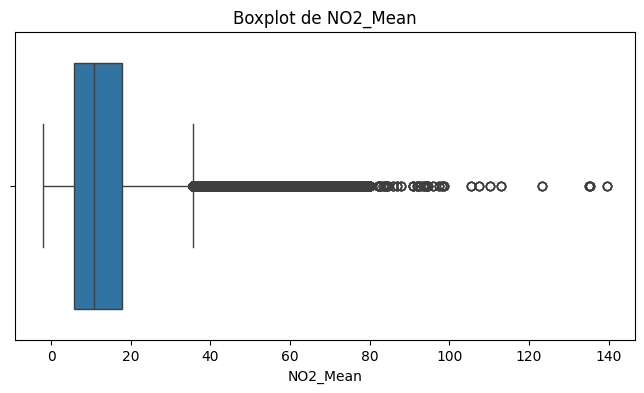

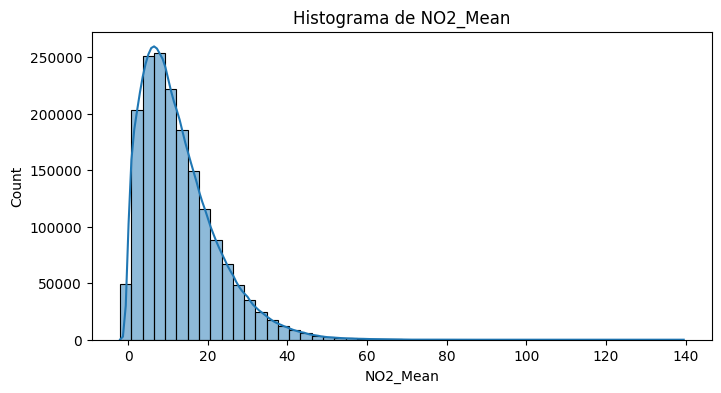

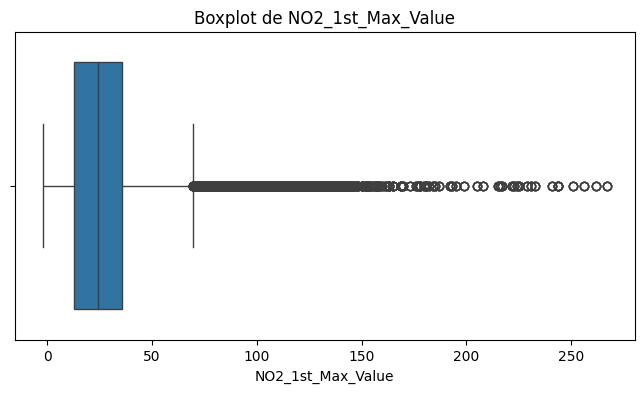

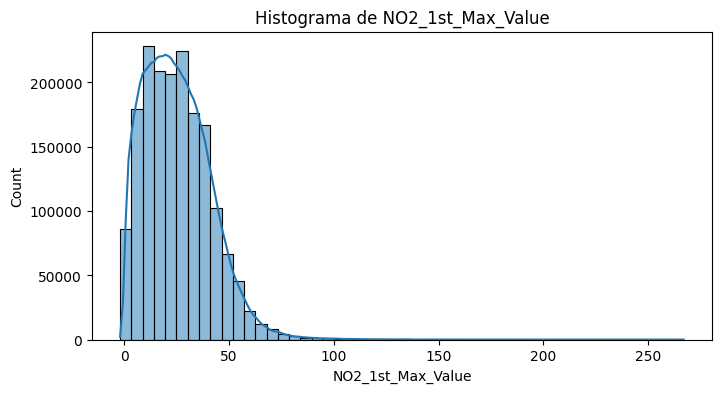

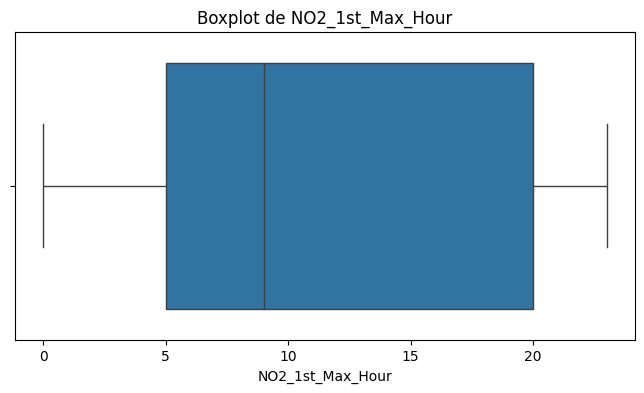

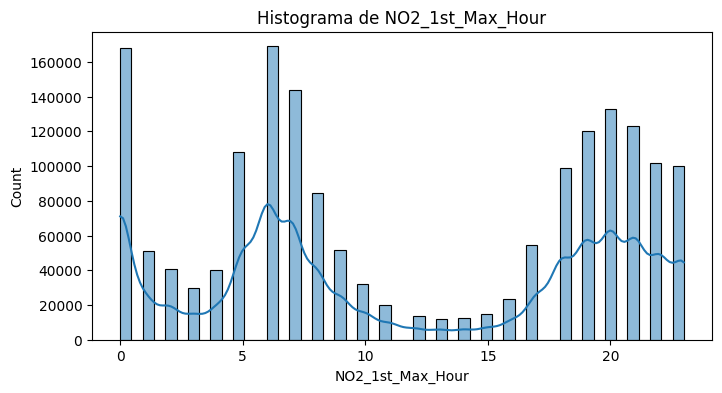

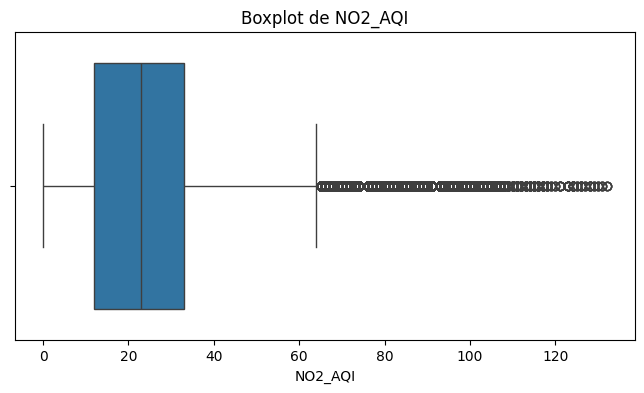

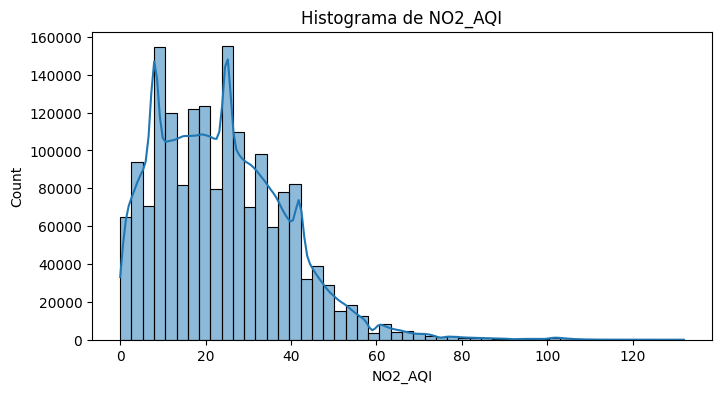

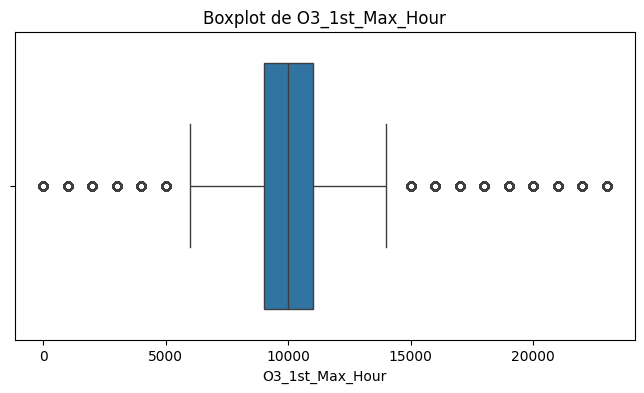

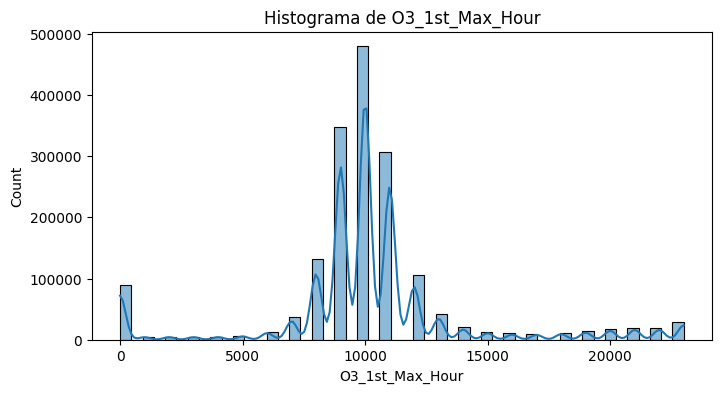

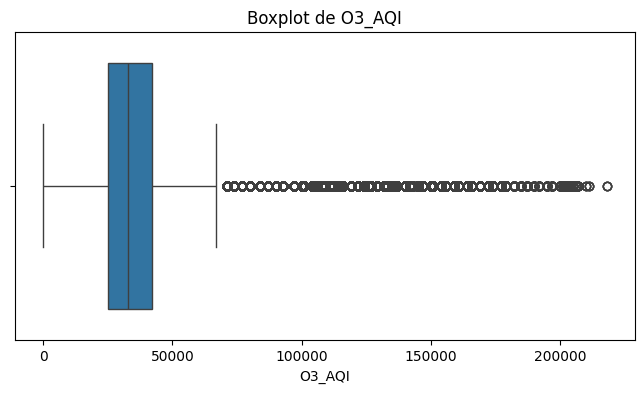

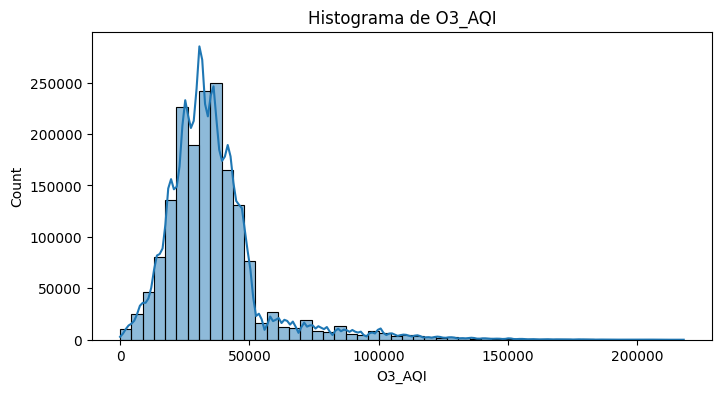

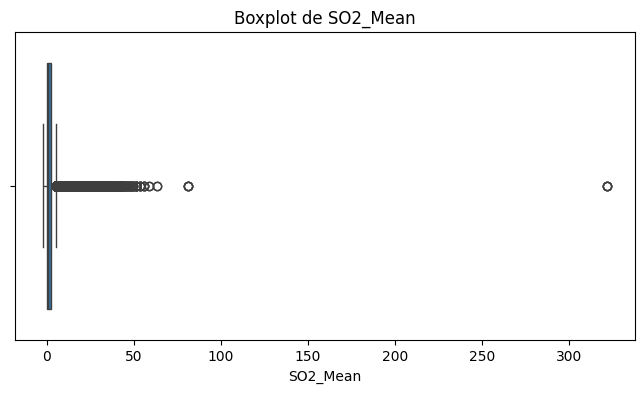

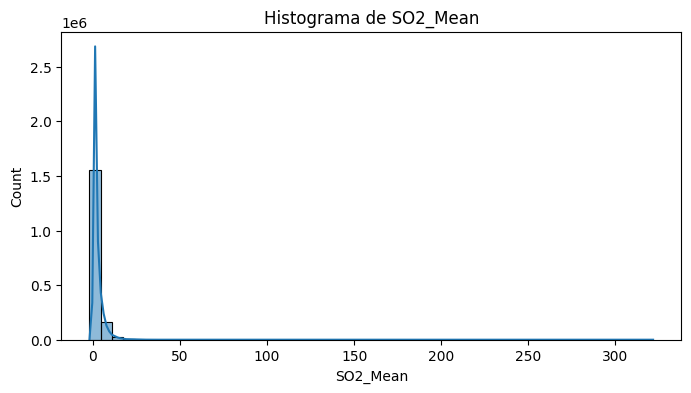

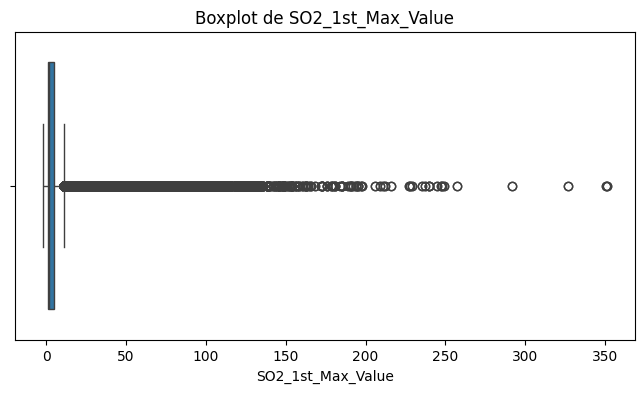

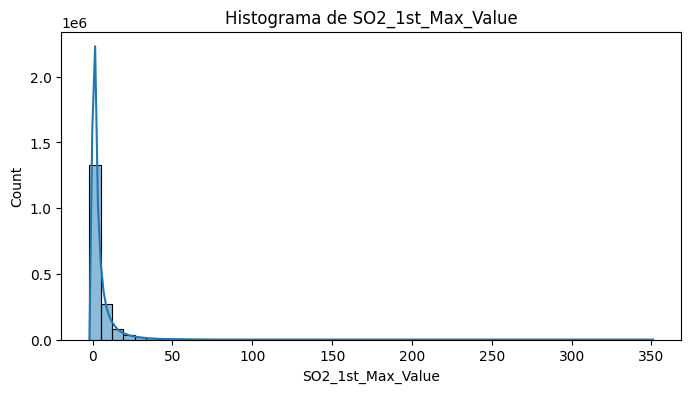

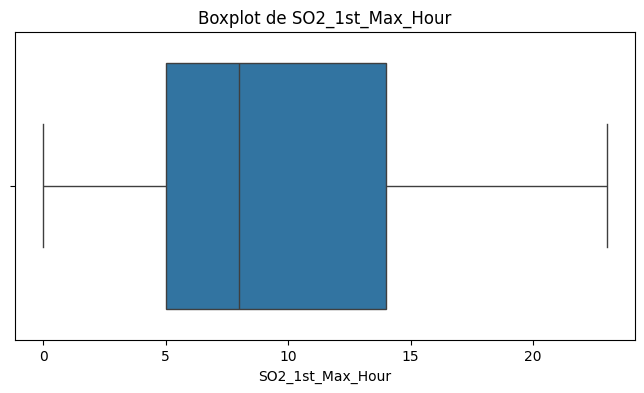

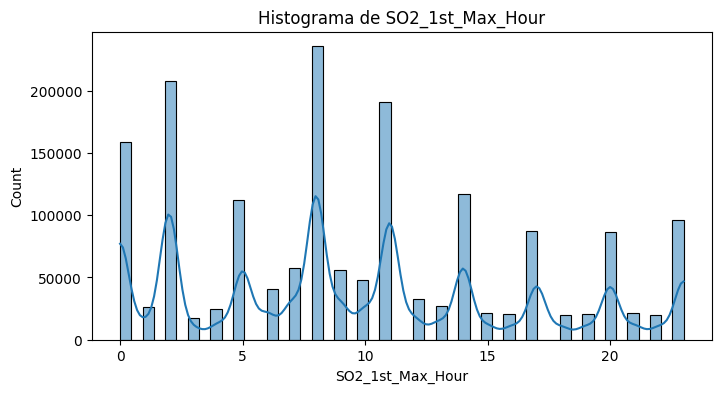

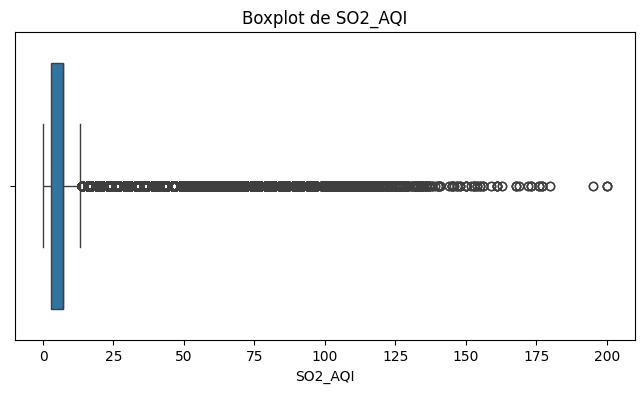

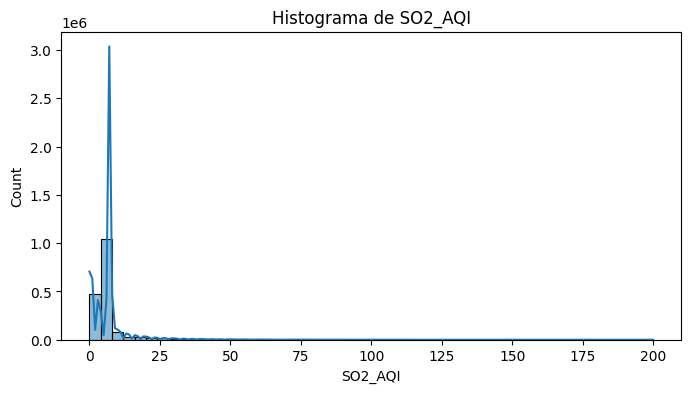

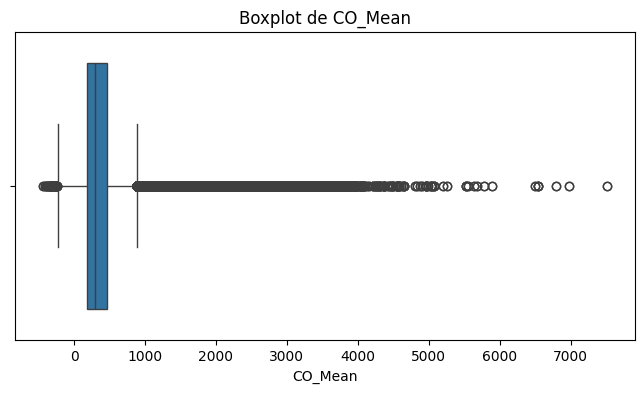

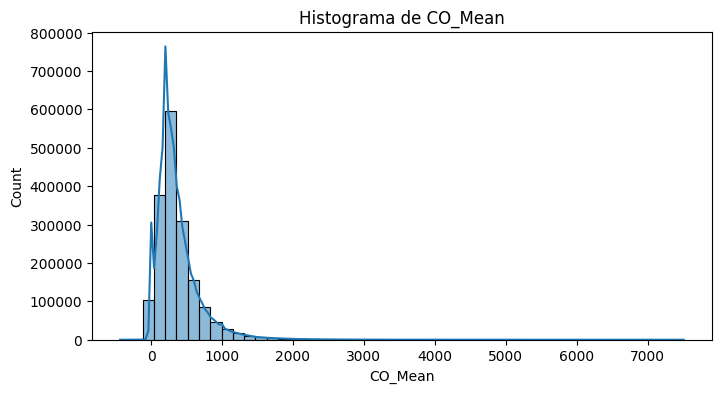

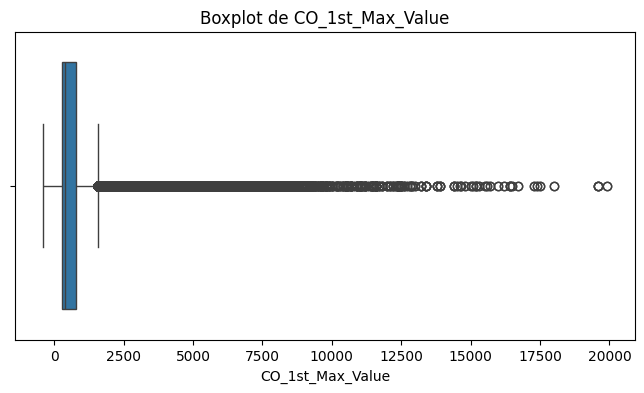

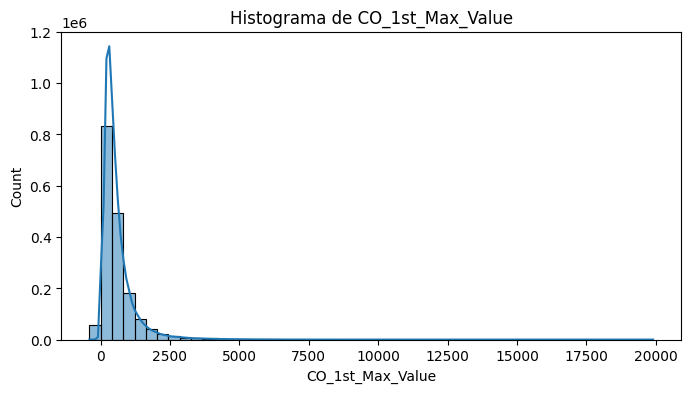

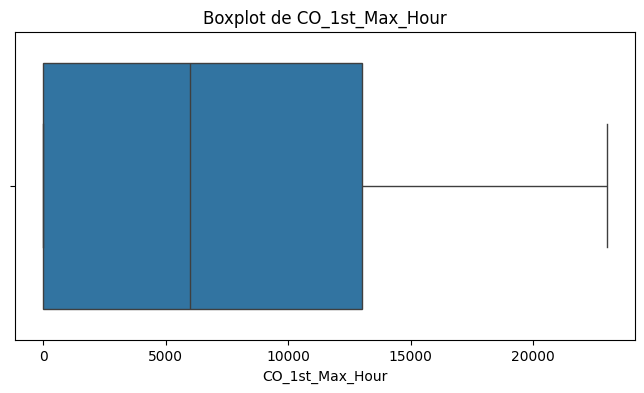

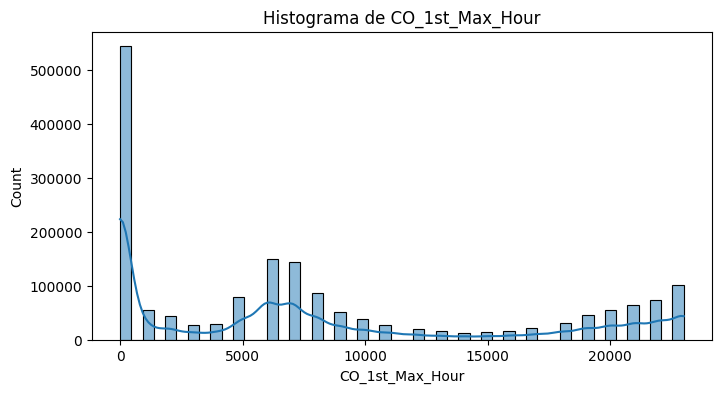

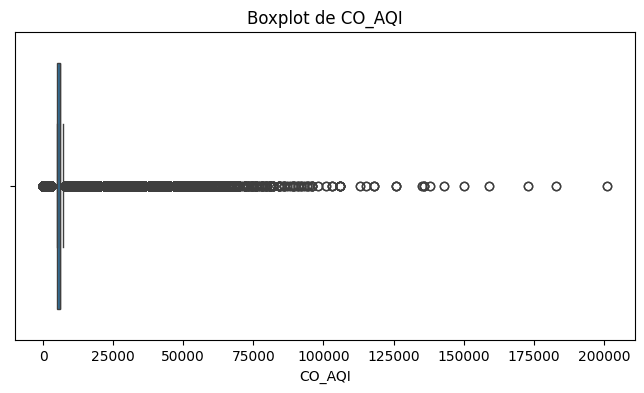

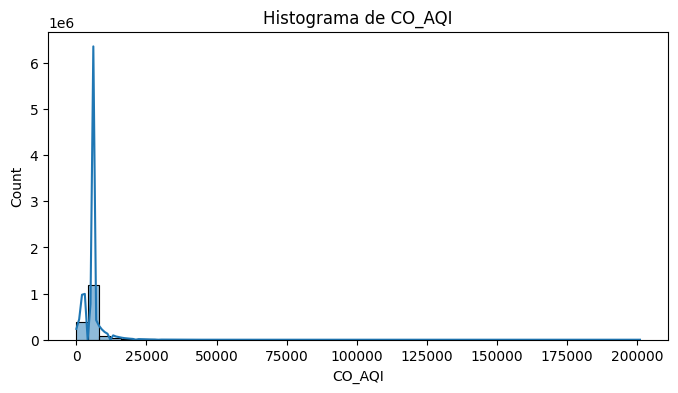

In [26]:
for col in cols_to_analyze:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

    plt.figure(figsize=(8,4))
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f'Histograma de {col}')
    plt.show()

Para identificar valores f√≠sicamente imposibles de contaminantes atmosf√©ricos como NO‚ÇÇ, O‚ÇÉ, SO‚ÇÇ y CO, es fundamental distinguir entre los l√≠mites normativos establecidos por organismos como la Uni√≥n Europea (UE) y la Organizaci√≥n Mundial de la Salud (OMS), y las concentraciones que exceden cualquier nivel plausible en condiciones reales.

üîé L√≠mites Normativos vs. Valores F√≠sicamente Imposibles
L√≠mites Normativos: Definidos por la UE y la OMS para proteger la salud humana y el medio ambiente. Por ejemplo, la OMS recomienda para el NO‚ÇÇ un l√≠mite de 200 ¬µg/m¬≥ como media de una hora.

Valores F√≠sicamente Imposibles: Concentraciones que superan ampliamente cualquier nivel registrado en condiciones reales y que suelen deberse a errores de medici√≥n o fallos en los sensores. Por ejemplo, un valor de NO‚ÇÇ de 1,000 ¬µg/m¬≥ ser√≠a inveros√≠mil en condiciones atmosf√©ricas normales.

üìä Valores M√°ximos Plausibles para Cada Contaminante
A continuaci√≥n, se presentan los valores m√°ximos plausibles para cada contaminante, basados en datos hist√≥ricos y estudios cient√≠ficos:

Di√≥xido de Nitr√≥geno (NO‚ÇÇ):

L√≠mite normativo: 200 ¬µg/m¬≥ (media de 1 hora)

Valor f√≠sicamente imposible: > 500 ¬µg/m¬≥


Ozono (O‚ÇÉ):

L√≠mite normativo: 180 ¬µg/m¬≥ (umbral de informaci√≥n)

Valor f√≠sicamente imposible: > 300 ¬µg/m¬≥
miteco.gob.es

Di√≥xido de Azufre (SO‚ÇÇ):

L√≠mite normativo: 350 ¬µg/m¬≥ (media de 1 hora)

Valor f√≠sicamente imposible: > 1,000 ¬µg/m¬≥

Mon√≥xido de Carbono (CO):

L√≠mite normativo: 10 mg/m¬≥ (media de 8 horas)

Valor f√≠sicamente imposible: > 50 mg/m¬≥



In [27]:
def count_out_of_limit_cases(df, limits):
    """
    Cuenta cu√°ntos valores exceden los l√≠mites oficiales por columna.

    Par√°metros:
    - df: DataFrame de pandas con tus datos
    - limits: diccionario con {'columna': valor_l√≠mite}

    Retorna:
    - resumen: diccionario con {'columna': cantidad_excedida}
    - total_excedidos: suma total de todos los casos fuera de rango
    """
    out_of_limit_counts = {}

    for col, threshold in limits.items():
        if col in df.columns:
            count_exceeding = (df[col] > threshold).sum()
            out_of_limit_counts[col] = count_exceeding

    total_out_of_limit = sum(out_of_limit_counts.values())

    return out_of_limit_counts, total_out_of_limit

# Define los l√≠mites
limits_norms = {
    "NO2_Mean": 21.3,             # 40 ¬µg/m¬≥ ‚âà 21.3 ppb (anual)
    "NO2_1st_Max_Value": 106.3,   # 200 ¬µg/m¬≥ ‚âà 106.3 ppb (1h)
    "NO2_AQI": 100,               # AQI √≠ndice, no concentraci√≥n

    "O3_AQI": 100,                # AQI √≠ndice, no concentraci√≥n
    "O3_1st_Max_Value": 61.1,     # 120 ¬µg/m¬≥ ‚âà 61.1 ppb (8h)

    "SO2_Mean": 7.6,              # 20 ¬µg/m¬≥ ‚âà 7.6 ppb (anual, aprox.)
    "SO2_1st_Max_Value": 190.7,   # 500 ¬µg/m¬≥ ‚âà 190.7 ppb (1h, aprox.)
    "SO2_AQI": 100,               # AQI √≠ndice, no concentraci√≥n

    "CO_Mean": 4_000,             # 4 mg/m¬≥ ‚âà 4,000 ppb (OMS, 24h)
    "CO_1st_Max_Value": 35_000,   # 35 ppm ‚âà 35,000 ppb (1h)
    "CO_AQI": 100                 # AQI √≠ndice, no concentraci√≥n
}

limits = {
    "NO2_Mean": 266.2,             # 500 ¬µg/m¬≥ ‚âà 266.2 ppb
    "NO2_1st_Max_Value": 266.2,    # Igual: umbral f√≠sicamente imposible

    "O3_1st_Max_Value": 152.5,     # 300 ¬µg/m¬≥ ‚âà 152.5 ppb

    "SO2_Mean": 380,              # 1000 ¬µg/m¬≥ ‚âà 380 ppb
    "SO2_1st_Max_Value": 380,     # Igual: umbral f√≠sicamente imposible

    "CO_Mean": 43_600,            # 50 mg/m¬≥ ‚âà 43,600 ppb
    "CO_1st_Max_Value": 43_600    # Igual: umbral f√≠sicamente imposible
}


# Llama a la funci√≥n
resumen, total = count_out_of_limit_cases(df, limits)

# Imprime resultados
print("Resumen de valores que exceden los l√≠mites oficiales:")
for col, count in resumen.items():
    print(f"{col}: {count} casos")

print(f"\nTotal de registros fuera de l√≠mites oficiales: {total}")

Resumen de valores que exceden los l√≠mites oficiales:
NO2_Mean: 0 casos
NO2_1st_Max_Value: 4 casos
SO2_Mean: 0 casos
SO2_1st_Max_Value: 0 casos
CO_Mean: 0 casos
CO_1st_Max_Value: 0 casos

Total de registros fuera de l√≠mites oficiales: 4


El resumen indica que √∫nicamente 4 registros superan los l√≠mites f√≠sicamente imposibles establecidos para los contaminantes analizados. Esto sugiere que la calidad del dataset es muy buena y que la mayor√≠a de las mediciones se encuentran dentro de rangos plausibles. Aunque la cantidad de valores extremos es muy baja, es recomendable revisar esos casos puntuales para confirmar si corresponden a errores de medici√≥n o eventos excepcionales. El siguiente paso podr√≠a ser un an√°lisis espacial y temporal para detectar posibles patrones en las concentraciones, as√≠ como validar la veracidad de los datos extremos.

In [28]:
# Extraer registros que superan el l√≠mite f√≠sicamente imposible para NO2_1st_Max_Value
# Filtramos los registros
df_NO2_imposibles = df[df["NO2_1st_Max_Value"] > 266.2]

# Mostrar los registros sospechosos
print("Registros con valores f√≠sicamente imposibles en NO2_1st_Max_Value:")
print(df_NO2_imposibles)

Registros con valores f√≠sicamente imposibles en NO2_1st_Max_Value:
         State_Code  County_Code  Site_Num  NO2_Mean  NO2_1st_Max_Value  \
12054             4           13      3003  135.1875              267.0   
128726            4           13      3003  135.1875              267.0   
1549005           4           13      3003  135.1875              267.0   
1644203           4           13      3003  135.1875              267.0   

         NO2_1st_Max_Hour  NO2_AQI  O3_1st_Max_Hour   O3_AQI  SO2_Mean  ...  \
12054                  20      132          10000.0  34000.0  1.871429  ...   
128726                 20      132          10000.0  34000.0  1.871429  ...   
1549005                20      132          10000.0  34000.0  1.863636  ...   
1644203                20      132          10000.0  34000.0  1.863636  ...   

         State_South Dakota  State_Tennessee  State_Texas  State_Utah  \
12054                     0                0            0           0   
128726        

Se eliminar√°n los 4 registros que presentan valores f√≠sicamente imposibles en la variable NO2_1st_Max_Value, ya que superan el umbral m√°ximo te√≥ricamente alcanzable en condiciones atmosf√©ricas reales. Estos valores no representan eventos extremos v√°lidos, sino errores de medici√≥n o fallos en el sensor, especialmente considerando que se repiten con los mismos valores y condiciones. Dado que son casos aislados y representan una fracci√≥n insignificante del total de datos, su eliminaci√≥n no afectar√° el an√°lisis estad√≠stico ni la validez de los resultados.

In [29]:
# Eliminamos los registros que lo superan
df = df[df["NO2_1st_Max_Value"] <= 266.2]

Para hacer un analisis mas preciso por estado y por tiempo utilizaremos el dataset sin limpiar

In [30]:
if None in df_raw.columns:
    df_raw = df_raw.drop(columns=[None])
print(df_raw.columns)

Index(['Unnamed:_0', 'State_Code', 'County_Code', 'Site_Num', 'Address',
       'State', 'County', 'City', 'Date_Local', 'NO2_Units', 'NO2_Mean',
       'NO2_1st_Max_Value', 'NO2_1st_Max_Hour', 'NO2_AQI', 'O3_Units',
       'O3_Mean', 'O3_1st_Max_Value', 'O3_1st_Max_Hour', 'O3_AQI', 'SO2_Units',
       'SO2_Mean', 'SO2_1st_Max_Value', 'SO2_1st_Max_Hour', 'SO2_AQI',
       'CO_Units', 'CO_Mean', 'CO_1st_Max_Value', 'CO_1st_Max_Hour', 'CO_AQI'],
      dtype='object')


In [31]:
# Seleccionar columnas con gases
cols_interes = [col for col in df_raw.columns if any(gas in str(col) for gas in ["NO2", "O3", "SO2", "CO"])]

# Excluir "_Units" y "_Max_Hour"
cols_interes = [
    col for col in cols_interes
    if not (str(col).endswith("_Units") or str(col).endswith("_Max_Hour"))
]

# Separar en tres listas
cols_mean = [col for col in cols_interes if str(col).endswith("_Mean")]
cols_aqi = [col for col in cols_interes if str(col).endswith("_AQI")]
cols_max_value = [col for col in cols_interes if str(col).endswith("_1st_Max_Value")]

print("Cols Mean:", cols_mean)
print("Cols AQI:", cols_aqi)
print("Cols 1st Max Value:", cols_max_value)


Cols Mean: ['NO2_Mean', 'O3_Mean', 'SO2_Mean', 'CO_Mean']
Cols AQI: ['NO2_AQI', 'O3_AQI', 'SO2_AQI', 'CO_AQI']
Cols 1st Max Value: ['NO2_1st_Max_Value', 'O3_1st_Max_Value', 'SO2_1st_Max_Value', 'CO_1st_Max_Value']


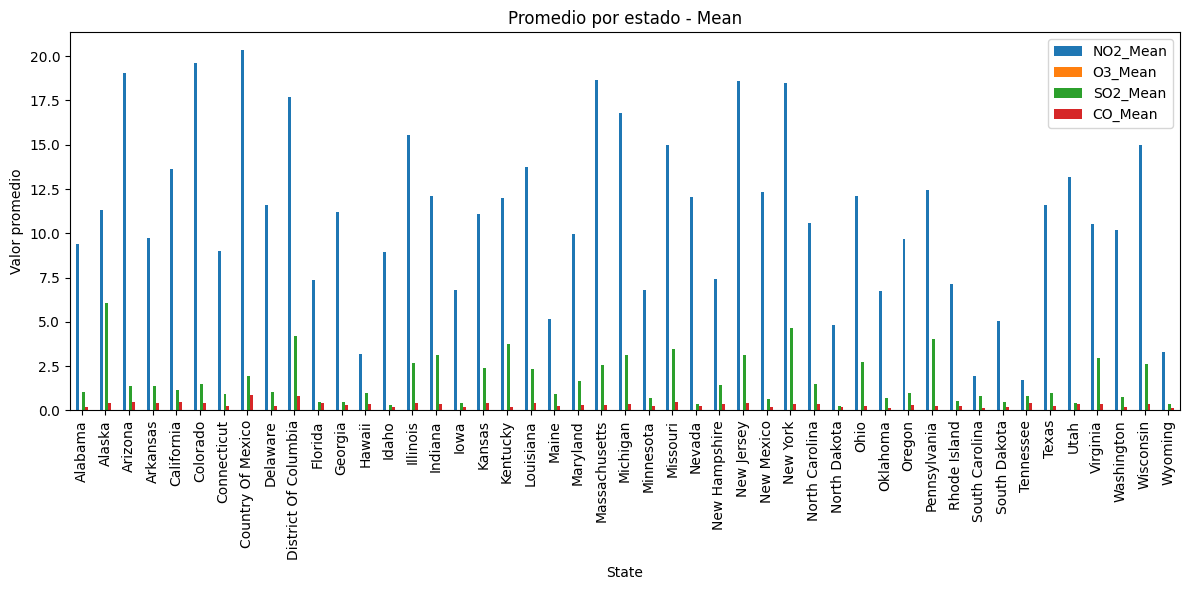

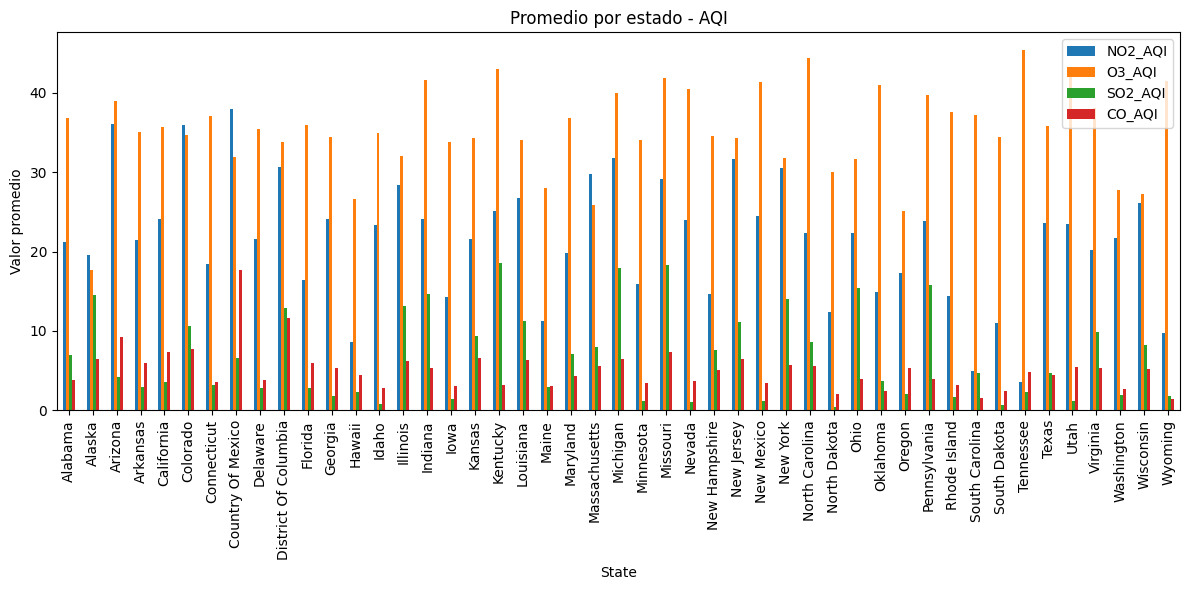

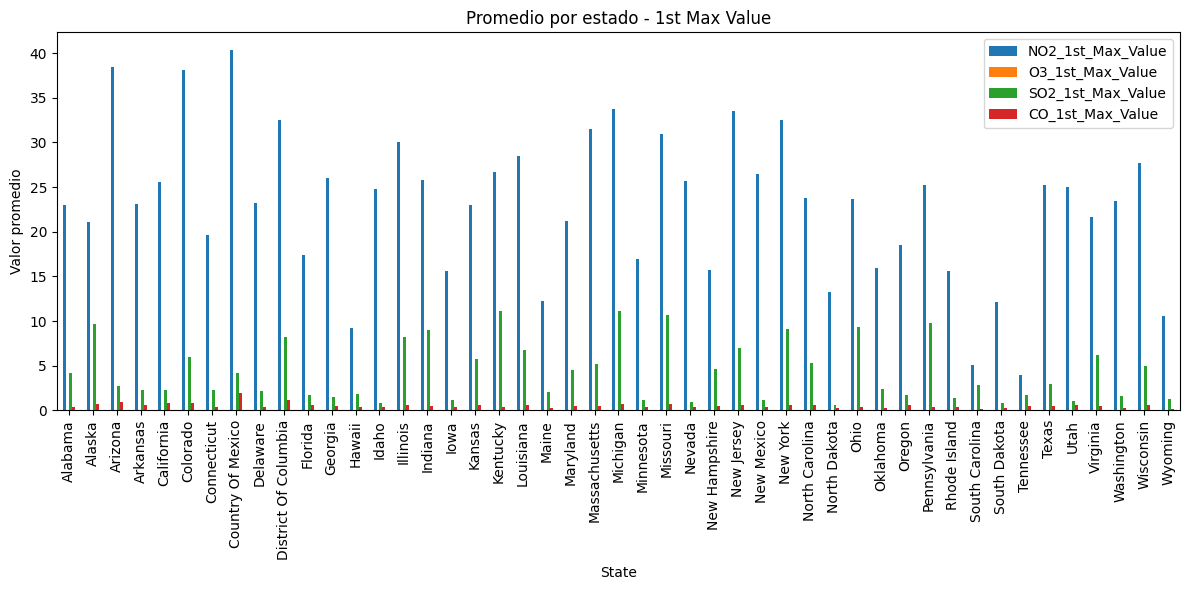

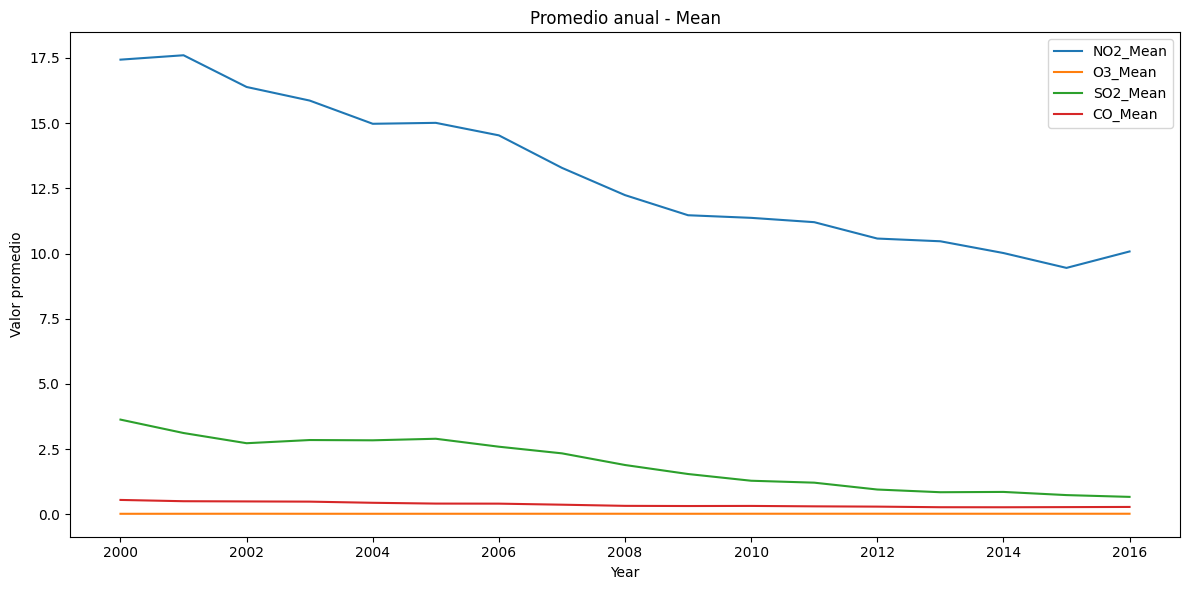

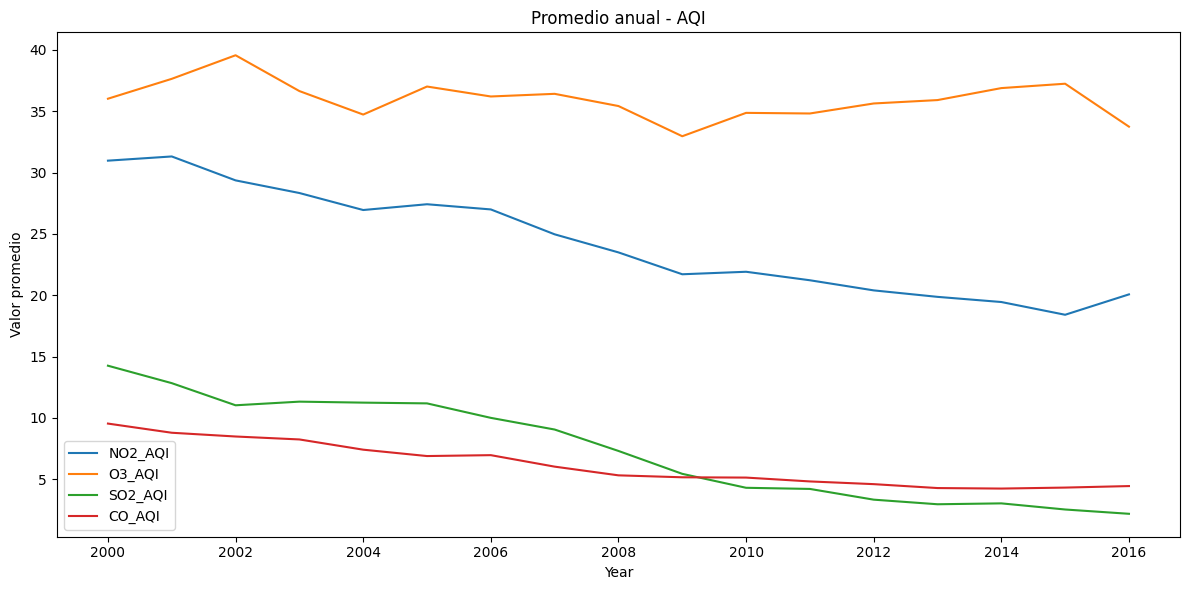

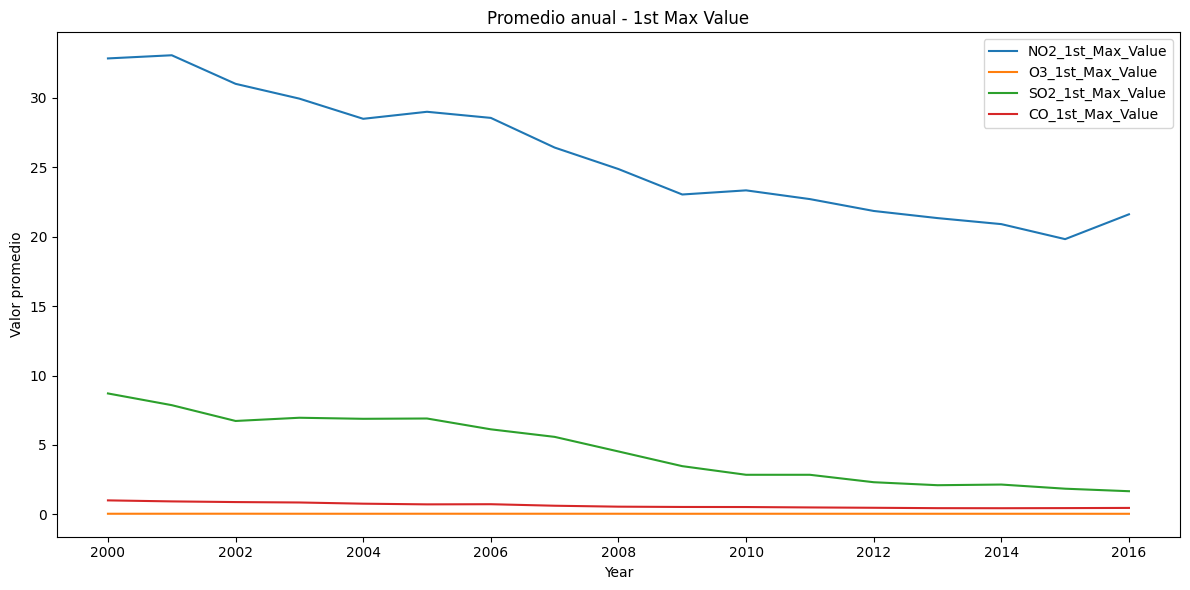

                      min       mean        75%         max
NO2_Mean          -2.0000  12.821930  17.713636  139.541667
NO2_1st_Max_Value -2.0000  25.414848  35.700000  267.000000
NO2_AQI            0.0000  23.898217  33.000000  132.000000
O3_Mean            0.0000   0.026125   0.033917    0.095083
O3_1st_Max_Value   0.0000   0.039203   0.048000    0.141000
O3_AQI             0.0000  36.050121  42.000000  218.000000
SO2_Mean          -2.0000   1.870364   2.325000  321.625000
SO2_1st_Max_Value -2.0000   4.492185   5.000000  351.000000
SO2_AQI            0.0000   7.115945   9.000000  200.000000
CO_Mean           -0.4375   0.368218   0.466667    7.508333
CO_1st_Max_Value  -0.4000   0.620107   0.800000   19.900000
CO_AQI             0.0000   5.996595   8.000000  201.000000


In [32]:
# ESPACIAL: promedio por estado
for group_name, col_list in [("Mean", cols_mean), ("AQI", cols_aqi), ("1st Max Value", cols_max_value)]:
    if col_list:  # solo si la lista no est√° vac√≠a
        spatial_means = df_raw.groupby("State")[col_list].mean()
        spatial_means.plot(kind="bar", figsize=(12,6))
        plt.title(f"Promedio por estado - {group_name}")
        plt.ylabel("Valor promedio")
        plt.tight_layout()
        plt.show()

# TEMPORAL: promedio por a√±o
df_raw["Date_Local"] = pd.to_datetime(df_raw["Date_Local"])
df_raw["Year"] = df_raw["Date_Local"].dt.year

for group_name, col_list in [("Mean", cols_mean), ("AQI", cols_aqi), ("1st Max Value", cols_max_value)]:
    if col_list:  # solo si la lista no est√° vac√≠a
        temporal_means = df_raw.groupby("Year")[col_list].mean()
        temporal_means.plot(figsize=(12,6))
        plt.title(f"Promedio anual - {group_name}")
        plt.ylabel("Valor promedio")
        plt.tight_layout()
        plt.show()

# # CHECK DE OUTLIERS REALES
# pollutants = ["NO2_Mean", "O3_Mean", "SO2_Mean", "CO_Mean"]
# for col in pollutants:
#     plt.figure(figsize=(8, 4)) # Es buena pr√°ctica crear una nueva figura para cada gr√°fico
#     sns.boxplot(x=df_raw[col])
#     plt.title(f"Distribuci√≥n y posibles outliers: {col}")
#     plt.show()

# EXTRA: resumen estad√≠stico
print(df_raw[cols_interes].describe().T[["min", "mean", "75%", "max"]])

Estos gr√°ficos e informaci√≥n estad√≠stica proporcionan una visi√≥n de la calidad del aire en diferentes estados y a lo largo del tiempo. Los datos muestran concentraciones de NO2, O3, SO2 y CO, tanto sus valores promedio (Mean) como sus valores m√°ximos (1st_Max_Value) y los valores del √çndice de Calidad del Aire (AQI).

En los gr√°ficos superiores, se observa que la calidad del aire var√≠a significativamente entre los estados. Algunos estados presentan picos de contaminaci√≥n notablemente m√°s altos, como se ve en los valores m√°ximos de NO2 y O3. Los gr√°ficos inferiores, que muestran tendencias anuales, revelan una disminuci√≥n generalizada en las concentraciones promedio y m√°ximas de NO2, SO2 y CO a lo largo de los a√±os (desde el 2000 hasta el 2016), lo cual sugiere mejoras en la calidad del aire para estos contaminantes. Sin embargo, los niveles de O3 se mantienen m√°s estables o incluso muestran ligeros aumentos en algunos a√±os.

Las estad√≠sticas resumen estos hallazgos:

NO2, SO2 y CO: Tienen valores m√°ximos significativamente m√°s altos que sus promedios, indicando episodios de alta contaminaci√≥n. La tendencia general es a la baja.
O3: Sus promedios y m√°ximos son relativamente bajos, pero su AQI es considerablemente m√°s alto que el de los otros contaminantes, lo que sugiere que incluso concentraciones bajas de O3 pueden contribuir a un AQI alto. La disminuci√≥n de O3 no es tan marcada como la de los otros contaminantes.
Valores negativos: La presencia de valores m√≠nimos negativos para NO2_Mean, NO2_1st_Max_Value, SO2_Mean, SO2_1st_Max_Value, CO_Mean y CO_1st_Max_Value podr√≠a indicar errores en la recolecci√≥n de datos o en la forma en que se registraron estos valores (por ejemplo, como valores que est√°n por debajo de un umbral de detecci√≥n o artefactos). Sin embargo, esto es poco com√∫n para la concentraci√≥n de contaminantes.
En resumen, si bien ha habido mejoras notables en la calidad del aire con respecto a NO2, SO2 y CO, el ozono sigue siendo un desaf√≠o, y la variabilidad regional en la contaminaci√≥n atmosf√©rica es un factor importante a considerar.

Ahora analizaremos los valores negativos para saber y estar seguro que son errores de mediciones o valores atipicos

In [33]:
# Generar resumen estad√≠stico solo para cols_interes
desc = df_raw[cols_interes].describe()

# Seleccionar columnas con m√≠nimo negativo
cols_with_negatives = [col for col in cols_interes if desc[col]["min"] < 0]

print("Columnas con valores m√≠nimos negativos:")
print(cols_with_negatives)

# Contar valores negativos por columna
for col in cols_with_negatives:
    negative_count = (df_raw[col] < 0).sum()
    print(f"{col:<25} -> {negative_count:>8} valores negativos")

Columnas con valores m√≠nimos negativos:
['NO2_Mean', 'NO2_1st_Max_Value', 'SO2_Mean', 'SO2_1st_Max_Value', 'CO_Mean', 'CO_1st_Max_Value']
NO2_Mean                  ->      896 valores negativos
NO2_1st_Max_Value         ->      184 valores negativos
SO2_Mean                  ->    22690 valores negativos
SO2_1st_Max_Value         ->     8286 valores negativos
CO_Mean                   ->     1064 valores negativos
CO_1st_Max_Value          ->      198 valores negativos


In [34]:
# Lista para guardar cada fila del resumen
resumen_negativos = []

for col in cols_with_negatives:
    negativos = df_raw[df_raw[col] < 0][col]
    resumen_negativos.append({
        "Columna": col,
        "Negativos": negativos.count(),
        "Min_neg": negativos.min(),
        "Max_neg": negativos.max(),
        "Mean_neg": negativos.mean(),
        "Valores_negativos": negativos.astype(str).tolist()
    })

# Crear DataFrame resumen
df_negativos = pd.DataFrame(resumen_negativos)

# Mostrarlo ordenado por cantidad de negativos (de mayor a menor)
df_negativos = df_negativos.sort_values(by="Negativos", ascending=False)

print(df_negativos)


             Columna  Negativos  Min_neg   Max_neg  Mean_neg  \
2           SO2_Mean      22690  -2.0000 -0.004167 -0.213477   
3  SO2_1st_Max_Value       8286  -2.0000 -0.100000 -0.277854   
4            CO_Mean       1064  -0.4375 -0.000364 -0.077272   
0           NO2_Mean        896  -2.0000 -0.004545 -0.511459   
5   CO_1st_Max_Value        198  -0.4000 -0.010000 -0.148586   
1  NO2_1st_Max_Value        184  -2.0000 -0.100000 -0.610870   

                                   Valores_negativos  
2  [-0.05, -0.05, -0.227273, -0.227273, -0.214286...  
3  [-0.3, -0.3, -0.3, -0.3, -0.3, -0.3, -0.3, -0....  
4  [-0.015385, -0.015385, -0.019048, -0.009524, -...  
0  [-0.279167, -0.279167, -0.279167, -0.279167, -...  
5  [-0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0....  
1  [-0.2, -0.2, -0.2, -0.2, -0.9, -0.9, -0.9, -0....  


Se decide reemplazar los valores negativos por 0 porque, en el contexto de concentraciones de contaminantes atmosf√©ricos, los valores negativos no tienen sentido f√≠sico y representan errores de medici√≥n o procesamiento. Dado que algunas columnas presentan miles de registros negativos, eliminarlos supondr√≠a una p√©rdida considerable de informaci√≥n. Usar la media como reemplazo introduce un sesgo artificial, mientras que el cero representa el m√≠nimo te√≥rico v√°lido. Esta decisi√≥n prioriza mantener la integridad f√≠sica de los datos sin distorsionar la distribuci√≥n original. Adem√°s, es una soluci√≥n sencilla y segura que evita a√±adir supuestos innecesarios.

In [35]:
for col in cols_with_negatives:
    df_raw[col] = df_raw[col].apply(lambda x: max(x, 0))

# Verificar valores negativos por columna
for col in cols_with_negatives:
    negative_count = (df_raw[col] < 0).sum()
    print(f"{col:<25} -> {negative_count:>8} valores negativos")

NO2_Mean                  ->        0 valores negativos
NO2_1st_Max_Value         ->        0 valores negativos
SO2_Mean                  ->        0 valores negativos
SO2_1st_Max_Value         ->        0 valores negativos
CO_Mean                   ->        0 valores negativos
CO_1st_Max_Value          ->        0 valores negativos


Ahora se revisar√° el cambio de los valores negativos en el analisis general de outliers y se revisar√° por los outliers positivos para su poesterior analisis y toma de decisiones por si hay que eliminarlso o aplicarles alguna transformacion

In [36]:
print(df_raw[cols_interes].describe().T[["min", "mean", "75%", "max"]])

                   min       mean        75%         max
NO2_Mean           0.0  12.822192  17.713636  139.541667
NO2_1st_Max_Value  0.0  25.414913  35.700000  267.000000
NO2_AQI            0.0  23.898217  33.000000  132.000000
O3_Mean            0.0   0.026125   0.033917    0.095083
O3_1st_Max_Value   0.0   0.039203   0.048000    0.141000
O3_AQI             0.0  36.050121  42.000000  218.000000
SO2_Mean           0.0   1.873137   2.325000  321.625000
SO2_1st_Max_Value  0.0   4.493503   5.000000  351.000000
SO2_AQI            0.0   7.115945   9.000000  200.000000
CO_Mean            0.0   0.368265   0.466667    7.508333
CO_1st_Max_Value   0.0   0.620124   0.800000   19.900000
CO_AQI             0.0   5.996595   8.000000  201.000000


conteo de outliers

In [37]:
# Diccionario para almacenar el n√∫mero de outliers por columna
outlier_counts = {}

# Calcular outliers por el m√©todo IQR
for col in cols_interes:
    Q1 = df_raw[col].quantile(0.25)
    Q3 = df_raw[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((df_raw[col] < lower_bound) | (df_raw[col] > upper_bound)).sum()
    outlier_counts[col] = outliers

# Mostrar los resultados
print("N√∫mero de outliers por columna:")
for col, count in outlier_counts.items():
    print(f"{col}: {count} outliers")

total_outliers = sum(outlier_counts.values())
print(f"\nN√∫mero total de outliers en todas las columnas: {total_outliers}")

N√∫mero de outliers por columna:
NO2_Mean: 48083 outliers
NO2_1st_Max_Value: 17598 outliers
NO2_AQI: 22828 outliers
O3_Mean: 6888 outliers
O3_1st_Max_Value: 29428 outliers
O3_AQI: 102862 outliers
SO2_Mean: 142365 outliers
SO2_1st_Max_Value: 167581 outliers
SO2_AQI: 67943 outliers
CO_Mean: 103059 outliers
CO_1st_Max_Value: 115148 outliers
CO_AQI: 35972 outliers

N√∫mero total de outliers en todas las columnas: 859755


In [38]:
from scipy.stats import zscore
from sklearn.ensemble import IsolationForest
from scipy.spatial.distance import mahalanobis

# Sup√≥n que ya tienes tu DataFrame llamado df_raw
df_out = df_raw.copy()
cols = df_out.select_dtypes(include=np.number).columns  # Solo columnas num√©ricas

# 1. Descripci√≥n general
summary = df_out[cols].describe().T

# 2. M√©todo IQR
def detect_iqr_outliers(df, cols):
    outlier_flags = pd.DataFrame(index=df.index)
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outlier_flags[col] = ((df[col] < lower) | (df[col] > upper)).astype(int)
    return outlier_flags.sum(axis=1) > 0

iqr_outliers = detect_iqr_outliers(df_out, cols)

# 3. Z-score
z_scores = np.abs(zscore(df_out[cols]))
z_outliers = (z_scores > 3).any(axis=1)

# 4. Mahalanobis
cov = np.cov(df_out[cols].dropna().T)
inv_covmat = np.linalg.inv(cov)
mean = df_out[cols].mean()
maha_dist = df_out[cols].apply(lambda row: mahalanobis(row, mean, inv_covmat), axis=1)
maha_outliers = maha_dist > 3

# 5. Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
iso_outliers = iso_forest.fit_predict(df_out[cols])
iso_outliers = iso_outliers == -1

# 6. Conteo de outliers detectados
df_outlier_flag = pd.DataFrame({
    "IQR": iqr_outliers,
    "Z-score": z_outliers,
    "Mahalanobis": maha_outliers,
    "IsolationForest": iso_outliers
})

outlier_counts = df_outlier_flag.sum().sort_values(ascending=False)
print("üîç N√∫mero de outliers detectados por m√©todo:\n")
print(outlier_counts)

üîç N√∫mero de outliers detectados por m√©todo:

IQR                819641
Mahalanobis        434184
Z-score            261462
IsolationForest     87333
dtype: int64


In [39]:
print(df_outlier_flag)

           IQR  Z-score  Mahalanobis  IsolationForest
0         True     True        False             True
1         True    False         True            False
2         True     True        False             True
3         True    False        False            False
4         True    False        False            False
...        ...      ...          ...              ...
1746656   True    False        False            False
1746657  False    False        False            False
1746658  False    False         True            False
1746659  False    False        False            False
1746660  False    False        False            False

[1746661 rows x 4 columns]


In [40]:
mask = df_outlier_flag.sum(axis=1) >= 2
df_clean = df[~mask].copy()

<ipython-input-40-9fae297db229>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean = df[~mask].copy()


In [41]:

# 2. Definir X e y
target = "O3_AQI"
X = df_clean.drop(columns=[target])
y = df_clean[target]

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Escalar datos solo para modelos lineales
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
lr = LinearRegression()
# Linear Regression
lr.fit(X_train_scaled, y_train)
lr_preds = lr.predict(X_test_scaled)
lr_r2 = r2_score(y_test, lr_preds)
print(f"üìä Linear Regression R¬≤: {lr_r2:.4f}")

üìä Linear Regression R¬≤: 0.1631


In [43]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
# Ridge Regression
ridge.fit(X_train_scaled, y_train)
ridge_preds = ridge.predict(X_test_scaled)
ridge_r2 = r2_score(y_test, ridge_preds)
print(f"üìä Ridge Regression R¬≤: {ridge_r2:.4f}")

üìä Ridge Regression R¬≤: 0.1631


In [44]:
!pip install xgboost

In [45]:
from xgboost import XGBRegressor
xgb = XGBRegressor(
    n_estimators=200,
    max_depth=10,
    learning_rate=0.2,
    subsample=1.0,
    colsample_bytree=1.0,
    reg_alpha=10,
    reg_lambda=3,
    random_state=42,
    verbosity=1
)
# XGBoost
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)
xgb_r2 = r2_score(y_test, xgb_preds)
print(f"üìä XGBoost R¬≤: {xgb_r2:.4f}")

üìä XGBoost R¬≤: 0.7443


In [46]:
!pip install lightgbm

In [47]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor(
    n_estimators=100,
    max_depth=10,
    random_state=42
)
# LightGBM
lgbm.fit(X_train, y_train)
lgbm_preds = lgbm.predict(X_test)
lgbm_r2 = r2_score(y_test, lgbm_preds)
print(f"üìä LightGBM R¬≤: {lgbm_r2:.4f}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.748850 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2557
[LightGBM] [Info] Number of data points in the train set: 1071303, number of used features: 67
[LightGBM] [Info] Start training from score 36065.944929
üìä LightGBM R¬≤: 0.5526


In [48]:
# Mostrar todos los resultados juntos
results = {
    "LinearRegression": lr_r2,
    "Ridge": ridge_r2,
    "XGBoost": xgb_r2,
    "LightGBM": lgbm_r2
}

print("\nüìà Comparaci√≥n final de R¬≤ sin outliers fuertes:\n")
for model, score in sorted(results.items(), key=lambda x: x[1], reverse=True):
    print(f"{model}: {score:.4f}")


üìà Comparaci√≥n final de R¬≤ sin outliers fuertes:

XGBoost: 0.7443
LightGBM: 0.5526
Ridge: 0.1631
LinearRegression: 0.1631


In [49]:
from sklearn.model_selection import cross_val_score

# Modelo con los mismos hiperpar√°metros ya ajustados
xgb_model_cv = XGBRegressor(
    n_estimators=200,
    max_depth=10,
    learning_rate=0.2,
    subsample=1.0,
    colsample_bytree=1.0,
    reg_alpha=10,
    reg_lambda=3,
    random_state=42,
    verbosity=0
)

# Validaci√≥n cruzada 5-fold usando R¬≤
cv_scores = cross_val_score(xgb_model_cv, X_train, y_train, cv=5, scoring='r2')

print("üìä Validaci√≥n cruzada (R¬≤):")
print(f"Scores por fold: {cv_scores}")
print(f"Media R¬≤: {cv_scores.mean():.4f}")
print(f"Desviaci√≥n est√°ndar: {cv_scores.std():.4f}")


üìä Validaci√≥n cruzada (R¬≤):
Scores por fold: [0.74061289 0.73851007 0.73829614 0.74323611 0.74413849]
Media R¬≤: 0.7410
Desviaci√≥n est√°ndar: 0.0024


In [50]:
!pip install catboost

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 99.2/99.2 MB 8.8 MB/s eta 0:00:00


In [51]:
from catboost import CatBoostRegressor

# Inicializar CatBoost con hiperpar√°metros razonables
cat_model = CatBoostRegressor(
    iterations=200,
    learning_rate=0.2,
    depth=10,
    random_seed=42,
    verbose=0  # Silencia salida extensa
)

# Entrenar CatBoost
cat_model.fit(X_train, y_train)

# Predecir
cat_preds = cat_model.predict(X_test)

# Evaluar
cat_mse = mean_squared_error(y_test, cat_preds)
cat_r2 = r2_score(y_test, cat_preds)

print(f"CatBoost - MSE: {cat_mse:.4f}")
print(f"CatBoost - R¬≤:  {cat_r2:.4f}")


CatBoost - MSE: 144597025.7930
CatBoost - R¬≤:  0.6316


YA se ha visto que no hay mucha diferencia quitando los outliers fuertes (quitar los outliers que en al menos 2 detecteros de outliers lo confirmen) ya que siendo mas conservador quitando los de 4 columnas se eliminarian muy pocos para que se aprecie la diferencia. Ahora se intentar√° hacer eliminando los valores outliers extremos y tratar los demas otliers por winsorizacion

In [52]:
# Contar cu√°ntas columnas tienen outliers por fila
outlier_counts = df_outlier_flag.sum(axis=1)

# Filas con ‚â•4 outliers (fuertes)
very_strong_outliers = outlier_counts >= 4

# Filas con exactamente 1 outlier (medianos)
strong_outliers = outlier_counts >= 3

# Mostrar resultados
print(f"Total de filas: {len(df_outlier_flag)}")
print(f"Outliers fuertes (‚â•4 variables): {very_strong_outliers.sum()}")
print(f"Outliers medianos (‚â•3 variable): {strong_outliers.sum()}")

Total de filas: 1746661
Outliers fuertes (‚â•4 variables): 19628
Outliers medianos (‚â•3 variable): 123598


Se elige eliminar las filas con outliers en 4 o m√°s columnas porque representan casos con m√∫ltiples variables extremas simult√°neamente, lo que indica que esos registros son altamente at√≠picos y posiblemente err√≥neos o no representativos del comportamiento general del conjunto de datos. Al eliminar solo estos casos m√°s severos y conservar aquellos con outliers en menos columnas, se logra un buen equilibrio entre limpieza del dataset y conservaci√≥n de informaci√≥n √∫til. Adem√°s, los registros con outliers en menos columnas pueden ser tratados posteriormente mediante t√©cnicas como la winsorizaci√≥n, evitando as√≠ una p√©rdida excesiva de datos valiosos.

In [53]:
df_clean_4_columns = df[~very_strong_outliers].copy()

<ipython-input-53-d01f0f27c7a9>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean_4_columns = df[~very_strong_outliers].copy()


In [56]:
def columns_to_winsorize(df, skew_th=1.0, kurt_th=3.0):
    skewed = df.skew().abs()
    kurt = df.kurtosis()

    seleccion = df.columns[(skewed > skew_th) | (kurt > kurt_th)]
    print("üìç Columnas con alta asimetr√≠a o curtosis (sugeridas para winsorizaci√≥n):")
    print(seleccion.tolist())
    return seleccion

cols_interes_not_O3_1st_Max_Value_O3_Mean = [col for col in cols_interes if
                                             col not in ['O3_Mean', 'O3_1st_Max_Value']]

columns_to_winsorize(df_clean_4_columns[cols_interes_not_O3_1st_Max_Value_O3_Mean])

üìç Columnas con alta asimetr√≠a o curtosis (sugeridas para winsorizaci√≥n):
['NO2_Mean', 'NO2_1st_Max_Value', 'O3_AQI', 'SO2_Mean', 'SO2_1st_Max_Value', 'SO2_AQI', 'CO_Mean', 'CO_1st_Max_Value', 'CO_AQI']


Index(['NO2_Mean', 'NO2_1st_Max_Value', 'O3_AQI', 'SO2_Mean',
       'SO2_1st_Max_Value', 'SO2_AQI', 'CO_Mean', 'CO_1st_Max_Value',
       'CO_AQI'],
      dtype='object')

In [57]:
from scipy.stats.mstats import winsorize

def apply_winsorization(df, columnas, limits=(0.01, 0.01)):
    df_wins = df.copy()
    for col in columnas:
        data_col = df_wins[col].values
        df_wins[col] = winsorize(data_col, limits=limits)
    return df_wins

df_winsorized = apply_winsorization(df_clean_4_columns,
                                      cols_interes_not_O3_1st_Max_Value_O3_Mean, limits=(0.01, 0.01))


In [62]:
def verify_winsorization(df_original, df_wins, columnas, limits=(0.01, 0.01)):
    print("Verificaci√≥n de Winsorizaci√≥n:")
    for col in columnas:
        min_orig, max_orig = df_original[col].min(), df_original[col].max()
        min_wins, max_wins = df_wins[col].min(), df_wins[col].max()

        lower_threshold = df_original[col].quantile(limits[0])
        upper_threshold = df_original[col].quantile(1 - limits[1])

        lower_trimmed = (df_wins[col] == lower_threshold).sum()
        upper_trimmed = (df_wins[col] == upper_threshold).sum()

        print(f"Columna: {col}")
        print(f"   Min: {min_orig:.3f} ‚Üí {min_wins:.3f}")
        print(f"   Max: {max_orig:.3f} ‚Üí {max_wins:.3f}")
        if min_orig != min_wins or max_orig != max_wins:
            print(f" Winsorizaci√≥n aplicada (se recortaron extremos)")
        else:
            print(f"No se detecta cambio (posiblemente sin outliers extremos)")
        print(f"{lower_trimmed} valores fijados al l√≠mite inferior ({lower_threshold:.3f})")
        print(f"{upper_trimmed} valores fijados al l√≠mite superior ({upper_threshold:.3f})\n")

verify_winsorization(df_clean_4_columns, df_winsorized,
                        cols_interes_not_O3_1st_Max_Value_O3_Mean, limits=(0.01, 0.01))


Verificaci√≥n de Winsorizaci√≥n:
Columna: NO2_Mean
   Min: -2.000 ‚Üí 0.174
   Max: 139.542 ‚Üí 42.833
 Winsorizaci√≥n aplicada (se recortaron extremos)
17634 valores fijados al l√≠mite inferior (0.174)
17282 valores fijados al l√≠mite superior (42.833)

Columna: NO2_1st_Max_Value
   Min: -2.000 ‚Üí 1.000
   Max: 262.000 ‚Üí 70.000
 Winsorizaci√≥n aplicada (se recortaron extremos)
27486 valores fijados al l√≠mite inferior (1.000)
17362 valores fijados al l√≠mite superior (70.000)

Columna: NO2_AQI
   Min: 0.000 ‚Üí 1.000
   Max: 131.000 ‚Üí 68.000
 Winsorizaci√≥n aplicada (se recortaron extremos)
36755 valores fijados al l√≠mite inferior (1.000)
17362 valores fijados al l√≠mite superior (68.000)

Columna: O3_AQI
   Min: 0.000 ‚Üí 6000.000
   Max: 218000.000 ‚Üí 116000.000
 Winsorizaci√≥n aplicada (se recortaron extremos)
18469 valores fijados al l√≠mite inferior (6000.000)
17772 valores fijados al l√≠mite superior (116000.000)

Columna: SO2_Mean
   Min: -2.000 ‚Üí -0.043
   Max: 321.62

Bibliograf√≠a

European Environment Agency (EEA)
European Union Air Quality Standards
https://www.eea.europa.eu/themes/air/air-quality-standards

World Health Organization (WHO)
WHO Global Air Quality Guidelines (2021)
https://www.who.int/publications/i/item/9789240034228

United States Environmental Protection Agency (EPA)
National Ambient Air Quality Standards (NAAQS)
https://www.epa.gov/naaqs

European Commission
Directive 2008/50/EC on ambient air quality and cleaner air for Europe
https://eur-lex.europa.eu/legal-content/EN/TXT/?uri=CELEX:32008L0050

U.S. AQI (Air Quality Index) Guide
https://www.airnow.gov/aqi/aqi-basics/

European AQI (Common Air Quality Index, CAQI)
https://www.airqualitynow.eu/about_indices_definition.php

World Health Organization (WHO) (2006)
Air quality guidelines: global update 2005
https://www.euro.who.int/__data/assets/pdf_file/0005/78638/E90038.pdf

Diez, S., et al. (2022). Air pollution measurement errors: is your data fit for purpose? Atmospheric Measurement Techniques, 15, 4091‚Äì4105. https://doi.org/10.5194/amt-15-4091-2022
amt.copernicus.org

U.S. Environmental Protection Agency (EPA). (2021). Best Practices for Review and Validation of Ambient Air Monitoring Data. https://www.epa.gov/system/files/documents/2021-10/data-validation-guidance-document-final-august-2021.pdf
epa.gov

EPA. (2020). Quality Assurance Handbook for Air Pollution Measurement Systems. https://www.epa.gov/sites/default/files/2020-10/documents/final_handbook_document_1_17.pdf
epa.gov

Zoi Environment Network. (2023). Air Quality Monitoring and Data Management Guidebook. https://zoinet.org/wp-content/uploads/2023/02/Air-quality-monitoring_EN.pdf
zoinet.org

New Zealand Ministry for the Environment. (2009). Good Practice Guide for Air Quality Monitoring and Data Management. https://environment.govt.nz/assets/Publications/Files/good-practice-guide-for-air-quality.pdf
environment.govt.nz

Comparaci√≥n de modelos: Regresi√≥n Lineal, Random Forest y LightGBM
En este estudio, se aplicaron tres algoritmos de regresi√≥n distintos sobre el mismo conjunto de datos, cuyo objetivo era predecir el √≠ndice de calidad del aire basado en ozono (O3_AQI) a partir de variables meteorol√≥gicas, contaminantes y caracter√≠sticas geogr√°ficas. Los modelos evaluados fueron: Regresi√≥n Lineal, Random Forest y LightGBM (una variante eficiente de los √°rboles de decisi√≥n en gradiente).

1. Regresi√≥n Lineal
La regresi√≥n lineal se utiliz√≥ como modelo base debido a su simplicidad y facilidad de interpretaci√≥n. A pesar de su naturaleza lineal, logr√≥ obtener resultados sorprendentemente buenos con un R¬≤ promedio de 0.91 en validaci√≥n cruzada, lo que indica una relaci√≥n lineal fuerte entre las variables predictoras y la variable objetivo. Este resultado sugiere que parte de la variabilidad en O3_AQI puede explicarse mediante relaciones lineales simples, lo cual ya es un buen punto de partida.

2. Random Forest
El modelo de Random Forest mostr√≥ un ajuste pr√°cticamente perfecto, con un R¬≤ de 1.00 en el conjunto de test y valores muy similares en entrenamiento. Esto es indicativo de un modelo extremadamente preciso, pero tambi√©n levanta preocupaciones sobre sobreajuste (overfitting). Aunque los resultados son impresionantes, es importante recordar que Random Forest puede memorizar patrones complejos, especialmente si no se ajustan adecuadamente hiperpar√°metros como la profundidad de los √°rboles o el n√∫mero de muestras m√≠nimas por hoja. A pesar de esto, la validaci√≥n cruzada confirm√≥ un rendimiento igualmente alto, lo que sugiere que el modelo est√° aprendiendo patrones reales en los datos y no solo ruido.

3. LightGBM
LightGBM fue el modelo m√°s eficiente en t√©rminos de tiempo de entrenamiento y manejo de caracter√≠sticas categ√≥ricas tras el preprocesamiento adecuado. Este modelo tambi√©n logr√≥ un R¬≤ cercano a 1.00 en test y validaci√≥n cruzada, y ofreci√≥ una buena capacidad para interpretar la importancia de las variables. De hecho, las variables m√°s importantes seg√∫n LightGBM coincid√≠an con las que presentaban mayor correlaci√≥n con O3_AQI, lo que valida la coherencia del enfoque. Adem√°s, se construy√≥ una curva de aprendizaje que evidenci√≥ un buen comportamiento del modelo al aumentar el tama√±o del conjunto de entrenamiento, sin se√±ales claras de sobreajuste.

Conclusi√≥n comparativa
Los tres modelos presentan un rendimiento muy alto en este problema, lo que indica que el dataset posee una alta capacidad predictiva respecto a O3_AQI. Mientras que la regresi√≥n lineal proporciona una base interpretativa s√≥lida, los modelos no lineales (Random Forest y LightGBM) capturan relaciones m√°s complejas, logrando mayor precisi√≥n. LightGBM se posiciona como el modelo m√°s recomendable por su eficiencia, rendimiento y capacidad de interpretaci√≥n, siempre que se evite el sobreajuste mediante validaci√≥n adecuada y control de hiperpar√°metros.



Regresi√≥n Lineal (con regularizaci√≥n Ridge/Lasso/ElasticNet):

alpha: fuerza de la regularizaci√≥n (ej. 0.01 a 100)

tipo de regularizaci√≥n: L1 (Lasso), L2 (Ridge) o ambas (ElasticNet)

Random Forest:

n_estimators: n√∫mero de √°rboles (ej. 100, 200)

max_depth: profundidad m√°xima del √°rbol (ej. 10, 20, None)

min_samples_split: m√≠nimo n√∫mero de muestras para dividir un nodo (ej. 2, 5)

min_samples_leaf: m√≠nimo n√∫mero de muestras en una hoja (ej. 1, 2)

max_features: n√∫mero de caracter√≠sticas consideradas en cada divisi√≥n (ej. 'auto', 'sqrt')

LightGBM:

num_leaves: n√∫mero de hojas por √°rbol (ej. 31, 50, 100)

learning_rate: tasa de aprendizaje (ej. 0.01, 0.05, 0.1)

n_estimators: n√∫mero de √°rboles (ej. 100, 500, 1000)

max_depth: profundidad m√°xima (ej. -1 para sin l√≠mite, 10, 20)

min_data_in_leaf: m√≠nimo n√∫mero de datos en hoja (ej. 20, 50, 100)

feature_fraction: fracci√≥n de caracter√≠sticas usadas por √°rbol (ej. 0.6, 0.8, 1.0)

bagging_fraction y bagging_freq: muestreo de datos y frecuencia (ej. 0.6, 0.8, 1.0 y 0, 5, 10)